# **Aim of the notebook:**
To check if the bias exsists in the Training dataset of IndicTrans2. Bias here means if the translation of ambiguos words is done more for paternal than maternal. 
To check the ratio of sentences in paternal vs maternal in both training and dataset.

## Setup

In [57]:
%%capture
!git clone https://github.com/AI4Bharat/IndicTrans2.git

In [58]:
%%capture
%cd /content/IndicTrans2/huggingface_interface

In [59]:
%%capture
!python3 -m pip install nltk sacremoses pandas regex mock transformers>=4.33.2 mosestokenizer


In [60]:
!python3 -c "import nltk; nltk.download('punkt')"


[nltk_data] Downloading package punkt to /home/sofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
!python3 -m pip install bitsandbytes scipy accelerate datasets


In [62]:
!python3 -m pip install sentencepiece


In [63]:
print("Installed not all the required packages")

print("Installed all the required packages")

!git clone https://github.com/VarunGumma/IndicTransToolkit
%cd IndicTransToolkit
!python3 -m pip install --editable ./
%cd ..

Installed not all the required packages
Installed all the required packages


fatal: destination path 'IndicTransToolkit' already exists and is not an empty directory.
/home/sofia/multilingual/IndicTransToolkit
Obtaining file:///home/sofia/multilingual/IndicTransToolkit
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/VarunGumma/indic_nlp_library to /tmp/pip-install-2t6k01p2/indic-nlp-library-it2_f86677a8400141f3a3654379ea8ba67e
  Running command git clone --filter=blob:none --quiet https://github.com/VarunGumma/indic_nlp_library /tmp/pip-install-2t6k01p2/indic-nlp-library-it2_f86677a8400141f3a3654379ea8ba67e
  Resolved https://github.com/VarunGumma/indic_nlp_library to commit 601521e05ed0ed8f2165ac317a47d186e25b6f0d
  Preparing metadata (setup.py) ... done
  Attempting uninstall: IndicTransToolkit
    Found existing installation: IndicTransToolkit 1.0.2
    Uninstalling IndicTransToolkit-1.0.2:
      Successfully uninstalled IndicTransToolkit-1.0.2
  DEPRECATION: Legacy editable install of IndicTransToolkit==1.0.2 from file:///home/sofia/mu

In [64]:
import pandas as pd

Restart after indic download

# Languages Involved:


In [12]:
# languages = [ 'or', 'hi', 'ta', 'te','bn', 'gu',  'kn', 'ml', 'mr',  'pa'  ]

# Datasets involved:

In [12]:
# path = 'https://indictrans2-public.objectstore.e2enetworks.net/IN22_testset.zip'
# # path = 'https://indictrans2-public.objectstore.e2enetworks.net/flores-22_dev.zip'
# zip_path = path.split('/')[-1]

# # Download the dataset using above link
# !wget $path -O $zip_path


In [13]:
# !unzip $zip_path

Archive:  IN22_testset.zip
   creating: IN22_testset/
   creating: IN22_testset/conv/
  inflating: IN22_testset/conv/test.npi_Deva  
  inflating: IN22_testset/conv/test.snd_Deva  
  inflating: IN22_testset/conv/test.ory_Orya  
  inflating: IN22_testset/conv/test.sat_Olck  
  inflating: IN22_testset/conv/metadata.tsv  
  inflating: IN22_testset/conv/test.brx_Deva  
  inflating: IN22_testset/conv/test.urd_Arab  
  inflating: IN22_testset/conv/test.tam_Taml  
  inflating: IN22_testset/conv/test.tel_Telu  
  inflating: IN22_testset/conv/test.eng_Latn  
  inflating: IN22_testset/conv/test.mni_Mtei  
  inflating: IN22_testset/conv/test.guj_Gujr  
  inflating: IN22_testset/conv/test.ben_Beng  
  inflating: IN22_testset/conv/test.gom_Deva  
  inflating: IN22_testset/conv/test.asm_Beng  
  inflating: IN22_testset/conv/test.pan_Guru  
  inflating: IN22_testset/conv/test.mar_Deva  
  inflating: IN22_testset/conv/test.mai_Deva  
  inflating: IN22_testset/conv/test.mal_Mlym  
  inflating: IN22_test

## Langs and scripts

In [65]:
# create a list with data (just include within bracket): Assamese (asm_Beng)	Kashmiri (Arabic) (kas_Arab)	Punjabi (pan_Guru)
# Bengali (ben_Beng)	Kashmiri (Devanagari) (kas_Deva)	Sanskrit (san_Deva)
# Bodo (brx_Deva)	Maithili (mai_Deva)	Santali (sat_Olck)
# Dogri (doi_Deva)	Malayalam (mal_Mlym)	Sindhi (Arabic) (snd_Arab)
# English (eng_Latn)	Marathi (mar_Deva)	Sindhi (Devanagari) (snd_Deva)
# Konkani (gom_Deva)	Manipuri (Bengali) (mni_Beng)	Tamil (tam_Taml)
# Gujarati (guj_Gujr)	Manipuri (Meitei) (mni_Mtei)	Telugu (tel_Telu)
# Hindi (hin_Deva)	Nepali (npi_Deva)	Urdu (urd_Arab)
# Kannada (kan_Knda)	Odia (ory_Orya)	

lang_script_list = [
    # 'asm_Beng', 'kas_Arab',
                     'pan_Guru', 'ben_Beng', 
                    #  'kas_Deva', 'san_Deva', 'brx_Deva', 'mai_Deva', 'sat_Olck', 'doi_Deva',
                       'mal_Mlym',
                     #    #  'snd_Arab',
                     #    #    'eng_Latn', 
                           'mar_Deva', 
                     #    #    'snd_Deva', 'gom_Deva', 'mni_Beng', 
                           'tam_Taml', 'guj_Gujr', 
                     #    #    'mni_Mtei', 
                           'tel_Telu', 'hin_Deva', 
                     #    #    'npi_Deva', 'urd_Arab', 
                           'kan_Knda', 
                           'ory_Orya'
                           ]



In [66]:
# Traverse through each folder of XXXU and print the folder names
import os
import pandas as pd
import tqdm

# Create a list to store the folder names
# folders = []
 # create a list of 10 items of dataframes in an array
df_list = {
    i : pd.DataFrame() for i in (lang_script_list)
}

df_list

{'pan_Guru': Empty DataFrame
 Columns: []
 Index: [],
 'ben_Beng': Empty DataFrame
 Columns: []
 Index: [],
 'mal_Mlym': Empty DataFrame
 Columns: []
 Index: [],
 'mar_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'tam_Taml': Empty DataFrame
 Columns: []
 Index: [],
 'guj_Gujr': Empty DataFrame
 Columns: []
 Index: [],
 'tel_Telu': Empty DataFrame
 Columns: []
 Index: [],
 'hin_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'kan_Knda': Empty DataFrame
 Columns: []
 Index: [],
 'ory_Orya': Empty DataFrame
 Columns: []
 Index: []}

In [69]:

dataset_root = 'flores-22_dev/all/'
# Traverse through each folder of XXXU and print the folder names
for folder in os.listdir(dataset_root):
        indic_lang= folder.split('-')[1]
        if indic_lang in lang_script_list:
            
                # print the file names within the sub folders
                file = 'dev.'+indic_lang

                df = pd.DataFrame(columns=['eng_Latn', indic_lang])
                with open(dataset_root+folder+'/'+'dev.eng_Latn') as f:
                                df_en = f.readlines()
                with open(dataset_root+folder+'/'+file) as f:
                                df_ind = f.readlines()
                df = pd.DataFrame()
                df['eng_Latn'] = df_en
                df[indic_lang] = df_ind
                
                df_list[indic_lang] = pd.concat([df_list[indic_lang], df], axis=0)

                    
df_list        



# BPCC/nllb_filtered/eng_Latn-ory_Orya/train.eng_Latn

{'pan_Guru':                                               eng_Latn  \
 0    On Monday, scientists from the Stanford Univer...   
 1    Lead researchers say this may bring early dete...   
 2    The JAS 39C Gripen crashed onto a runway at ar...   
 3    The pilot was identified as Squadron Leader Di...   
 4    Local media reports an airport fire vehicle ro...   
 ..                                                 ...   
 992  The tourist season for the hill stations gener...   
 993  However, they have a different kind of beauty ...   
 994  Only a few airlines still offer bereavement fa...   
 995  Airlines that offer these include Air Canada, ...   
 996  In all cases, you must book by phone directly ...   
 
                                               pan_Guru  
 0    ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1    ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2    JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3    ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ ਲੀਡਰ ਦਿਲੋਕ੍ਰਿਤ ਪੱ

In [70]:
# ambiguos relations:
ambiguos = [
    # 'uncle', 'aunt', 'grandfather', 'grandmother',
    #          'brother in law', 'brother-in-law', 'sister in law', 'sister-in-law',
             'cousin', 'nephew', 'niece', 'child', 'children', 
             # singular possessive
             'uncle\'s', 'aunt\'s', 'grandfather\'s', 'grandmother\'s', 
                'brother in law\'s', 'brother-in-law\'s', 'sister in law\'s', 'sister-in-law\'s',
                'cousin\'s', 'nephew\'s', 'niece\'s', 'child\'s', 'children\'s',
                # plural possessive
                'uncles\'', 'aunts\'', 'grandfathers\'', 'grandmothers\'',
                'brothers in law\'s', 'brothers-in-law\'s', 'sisters in law\'s', 'sisters-in-law\'s',
                'cousins\'', 'nephews\'', 'nieces\'', 
                # plural
                'uncles', 'aunts', 'grandfathers', 'grandmothers',
                'brothers in law', 'brothers-in-law', 'sisters in law', 'sisters-in-law',
                'cousins', 'nephews', 'nieces',

             ]






In [31]:
# 'test_csv__/'+dataset_root[:-1]+'_'+lang+'.csv'

'test_csv__/IN22_testset_ory_Orya.csv'

In [71]:
# remove duplicates
rt = dataset_root.split('/')[0]
# do for all languages in df_list
for lang in df_list:
    df_list[lang] = df_list[lang][~df_list[lang].index.duplicated()]
    print(lang, df_list[lang].shape)
    # save the dataframes
    # df_list[lang].to_csv('test_csv__/'+lang+rt+'/'+lang index=False)
    
df_list

pan_Guru (997, 2)
ben_Beng (997, 2)
mal_Mlym (997, 2)
mar_Deva (997, 2)
tam_Taml (997, 2)
guj_Gujr (997, 2)
tel_Telu (997, 2)
hin_Deva (997, 2)
kan_Knda (997, 2)
ory_Orya (997, 2)


{'pan_Guru':                                               eng_Latn  \
 0    On Monday, scientists from the Stanford Univer...   
 1    Lead researchers say this may bring early dete...   
 2    The JAS 39C Gripen crashed onto a runway at ar...   
 3    The pilot was identified as Squadron Leader Di...   
 4    Local media reports an airport fire vehicle ro...   
 ..                                                 ...   
 992  The tourist season for the hill stations gener...   
 993  However, they have a different kind of beauty ...   
 994  Only a few airlines still offer bereavement fa...   
 995  Airlines that offer these include Air Canada, ...   
 996  In all cases, you must book by phone directly ...   
 
                                               pan_Guru  
 0    ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1    ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2    JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3    ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ ਲੀਡਰ ਦਿਲੋਕ੍ਰਿਤ ਪੱ

In [72]:
df_list_copy = df_list.copy() # make a copy of the original dataframes to save them for later use

## Filtering Dataframes as per English Ambiguous Relations

In [73]:
# tqdm progress bar for the for loop on df_list
# import tqdm
df_dict = {} # this dictionary will have key as language from df_list and value as another dictionary.
# this inner dictionary will have key as the word from ambiguos and value as the filtered dataframe containing that word in the english column. 

# using all ambiguous words make a regex pattern and filter the dataframes
# do for all languages in df_list

regex_pattern = '|'.join(ambiguos)

for lang in tqdm.tqdm(df_list):
    df = df_list[lang]
    df_dict[lang] = {}
    for word in ambiguos:
        df_dict[lang][word] = df[df['eng_Latn'].str.contains(word, case=False, )]
        print(lang, word, df_dict[lang][word].shape)
        df_dict[lang][word].to_csv(f'test_csv__/{lang}/{lang}_{word}_{rt}.csv', index=False)
    
    # .to_csv(f'{lang}_bpcc.csv', index=False)

df_dict

  0%|          | 0/10 [00:00<?, ?it/s]

pan_Guru cousin (1, 2)
pan_Guru nephew (0, 2)
pan_Guru niece (0, 2)
pan_Guru child (15, 2)
pan_Guru children (14, 2)
pan_Guru uncle's (0, 2)
pan_Guru aunt's (0, 2)
pan_Guru grandfather's (0, 2)
pan_Guru grandmother's (0, 2)
pan_Guru brother in law's (0, 2)
pan_Guru brother-in-law's (0, 2)
pan_Guru sister in law's (0, 2)
pan_Guru sister-in-law's (0, 2)
pan_Guru cousin's (0, 2)
pan_Guru nephew's (0, 2)
pan_Guru niece's (0, 2)
pan_Guru child's (0, 2)
pan_Guru children's (0, 2)
pan_Guru uncles' (0, 2)
pan_Guru aunts' (0, 2)
pan_Guru grandfathers' (0, 2)
pan_Guru grandmothers' (0, 2)
pan_Guru brothers in law's (0, 2)
pan_Guru brothers-in-law's (0, 2)
pan_Guru sisters in law's (0, 2)
pan_Guru sisters-in-law's (0, 2)
pan_Guru cousins' (0, 2)
pan_Guru nephews' (0, 2)
pan_Guru nieces' (0, 2)
pan_Guru uncles (0, 2)
pan_Guru aunts (0, 2)
pan_Guru grandfathers (0, 2)
pan_Guru grandmothers (0, 2)
pan_Guru brothers in law (0, 2)
pan_Guru brothers-in-law (0, 2)
pan_Guru sisters in law (0, 2)


 30%|███       | 3/10 [00:00<00:01,  6.63it/s]

pan_Guru sisters-in-law (0, 2)
pan_Guru cousins (0, 2)
pan_Guru nephews (0, 2)
pan_Guru nieces (0, 2)
ben_Beng cousin (1, 2)
ben_Beng nephew (0, 2)
ben_Beng niece (0, 2)
ben_Beng child (15, 2)
ben_Beng children (14, 2)
ben_Beng uncle's (0, 2)
ben_Beng aunt's (0, 2)
ben_Beng grandfather's (0, 2)
ben_Beng grandmother's (0, 2)
ben_Beng brother in law's (0, 2)
ben_Beng brother-in-law's (0, 2)
ben_Beng sister in law's (0, 2)
ben_Beng sister-in-law's (0, 2)
ben_Beng cousin's (0, 2)
ben_Beng nephew's (0, 2)
ben_Beng niece's (0, 2)
ben_Beng child's (0, 2)
ben_Beng children's (0, 2)
ben_Beng uncles' (0, 2)
ben_Beng aunts' (0, 2)
ben_Beng grandfathers' (0, 2)
ben_Beng grandmothers' (0, 2)
ben_Beng brothers in law's (0, 2)
ben_Beng brothers-in-law's (0, 2)
ben_Beng sisters in law's (0, 2)
ben_Beng sisters-in-law's (0, 2)
ben_Beng cousins' (0, 2)
ben_Beng nephews' (0, 2)
ben_Beng nieces' (0, 2)
ben_Beng uncles (0, 2)
ben_Beng aunts (0, 2)
ben_Beng grandfathers (0, 2)
ben_Beng grandmothers (0, 2)
b

 50%|█████     | 5/10 [00:00<00:00,  8.49it/s]

mar_Deva brother in law's (0, 2)
mar_Deva brother-in-law's (0, 2)
mar_Deva sister in law's (0, 2)
mar_Deva sister-in-law's (0, 2)
mar_Deva cousin's (0, 2)
mar_Deva nephew's (0, 2)
mar_Deva niece's (0, 2)
mar_Deva child's (0, 2)
mar_Deva children's (0, 2)
mar_Deva uncles' (0, 2)
mar_Deva aunts' (0, 2)
mar_Deva grandfathers' (0, 2)
mar_Deva grandmothers' (0, 2)
mar_Deva brothers in law's (0, 2)
mar_Deva brothers-in-law's (0, 2)
mar_Deva sisters in law's (0, 2)
mar_Deva sisters-in-law's (0, 2)
mar_Deva cousins' (0, 2)
mar_Deva nephews' (0, 2)
mar_Deva nieces' (0, 2)
mar_Deva uncles (0, 2)
mar_Deva aunts (0, 2)
mar_Deva grandfathers (0, 2)
mar_Deva grandmothers (0, 2)
mar_Deva brothers in law (0, 2)
mar_Deva brothers-in-law (0, 2)
mar_Deva sisters in law (0, 2)
mar_Deva sisters-in-law (0, 2)
mar_Deva cousins (0, 2)
mar_Deva nephews (0, 2)
mar_Deva nieces (0, 2)
tam_Taml cousin (1, 2)
tam_Taml nephew (0, 2)
tam_Taml niece (0, 2)
tam_Taml child (15, 2)
tam_Taml children (14, 2)
tam_Taml uncl

 70%|███████   | 7/10 [00:00<00:00,  9.52it/s]

guj_Gujr sisters in law's (0, 2)
guj_Gujr sisters-in-law's (0, 2)
guj_Gujr cousins' (0, 2)
guj_Gujr nephews' (0, 2)
guj_Gujr nieces' (0, 2)
guj_Gujr uncles (0, 2)
guj_Gujr aunts (0, 2)
guj_Gujr grandfathers (0, 2)
guj_Gujr grandmothers (0, 2)
guj_Gujr brothers in law (0, 2)
guj_Gujr brothers-in-law (0, 2)
guj_Gujr sisters in law (0, 2)
guj_Gujr sisters-in-law (0, 2)
guj_Gujr cousins (0, 2)
guj_Gujr nephews (0, 2)
guj_Gujr nieces (0, 2)
tel_Telu cousin (1, 2)
tel_Telu nephew (0, 2)
tel_Telu niece (0, 2)
tel_Telu child (15, 2)
tel_Telu children (14, 2)
tel_Telu uncle's (0, 2)
tel_Telu aunt's (0, 2)
tel_Telu grandfather's (0, 2)
tel_Telu grandmother's (0, 2)
tel_Telu brother in law's (0, 2)
tel_Telu brother-in-law's (0, 2)
tel_Telu sister in law's (0, 2)
tel_Telu sister-in-law's (0, 2)
tel_Telu cousin's (0, 2)
tel_Telu nephew's (0, 2)
tel_Telu niece's (0, 2)
tel_Telu child's (0, 2)
tel_Telu children's (0, 2)
tel_Telu uncles' (0, 2)
tel_Telu aunts' (0, 2)
tel_Telu grandfathers' (0, 2)
tel_

100%|██████████| 10/10 [00:01<00:00,  8.95it/s]

hin_Deva nephews (0, 2)
hin_Deva nieces (0, 2)
kan_Knda cousin (1, 2)
kan_Knda nephew (0, 2)
kan_Knda niece (0, 2)
kan_Knda child (15, 2)
kan_Knda children (14, 2)
kan_Knda uncle's (0, 2)
kan_Knda aunt's (0, 2)
kan_Knda grandfather's (0, 2)
kan_Knda grandmother's (0, 2)
kan_Knda brother in law's (0, 2)
kan_Knda brother-in-law's (0, 2)
kan_Knda sister in law's (0, 2)
kan_Knda sister-in-law's (0, 2)
kan_Knda cousin's (0, 2)
kan_Knda nephew's (0, 2)
kan_Knda niece's (0, 2)
kan_Knda child's (0, 2)
kan_Knda children's (0, 2)
kan_Knda uncles' (0, 2)
kan_Knda aunts' (0, 2)
kan_Knda grandfathers' (0, 2)
kan_Knda grandmothers' (0, 2)
kan_Knda brothers in law's (0, 2)
kan_Knda brothers-in-law's (0, 2)
kan_Knda sisters in law's (0, 2)
kan_Knda sisters-in-law's (0, 2)
kan_Knda cousins' (0, 2)
kan_Knda nephews' (0, 2)
kan_Knda nieces' (0, 2)
kan_Knda uncles (0, 2)
kan_Knda aunts (0, 2)
kan_Knda grandfathers (0, 2)
kan_Knda grandmothers (0, 2)
kan_Knda brothers in law (0, 2)
kan_Knda brothers-in-law

{'pan_Guru': {'cousin':                                              eng_Latn  \
  81  Hesperonychus elizabethae is a species of the ...   
  
                                               pan_Guru  
  81  ਹੇਸਪਰੌਨਿਕਸ ਐਲੀਜ਼ਾਬੇਥੇ (Hesperonychus elizabeth...  ,
  'nephew': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'niece': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'child':                                               eng_Latn  \
  39   Each show would also provide recommendations f...   
  170  The governor also stated, "Today, we learned t...   
  271  Dr. Lee also expressed his concern about repor...   
  501  Children develop an awareness of race and raci...   
  502  For instance, children who identify with a rac...   
  509  It is not a learning disability, it is a learn...   
  510  Children with ADD have a hard time focusing on...   
  511  These children tend to get into a lot of troub...   
  512  ADD affects relationships with other pe

In [74]:
df_list

{'pan_Guru':                                               eng_Latn  \
 0    On Monday, scientists from the Stanford Univer...   
 1    Lead researchers say this may bring early dete...   
 2    The JAS 39C Gripen crashed onto a runway at ar...   
 3    The pilot was identified as Squadron Leader Di...   
 4    Local media reports an airport fire vehicle ro...   
 ..                                                 ...   
 992  The tourist season for the hill stations gener...   
 993  However, they have a different kind of beauty ...   
 994  Only a few airlines still offer bereavement fa...   
 995  Airlines that offer these include Air Canada, ...   
 996  In all cases, you must book by phone directly ...   
 
                                               pan_Guru  
 0    ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1    ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2    JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3    ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ ਲੀਡਰ ਦਿਲੋਕ੍ਰਿਤ ਪੱ

## Dict of partition of translations

In [4]:
# load file from lang_rel_dict/ory_Orya/ory_Orya_grandmother_bpcc.csv
# df_lang_rel = pd.read_csv('lang_rel_dict/ory_Orya/ory_Orya_grandmother_bpcc.csv')

# df_lang_rel


,eng_Latn,ory_Orya
0,"""""""Dreams come true, my roommate Pradeep Krish...","ଏହାସହ ନାଗାର୍ଜୁନ ଲେଖିଛନ୍ତି, ' ସ୍ୱପ୍ନ ସତ ହେଲା, ମ..."
1,"""""""I never got a paisa's compensation from gov...","""""""କ୍ଷତିପୂରଣ ବାବଦକୁ ମୁଁ ସରକାରଙ୍କ ଠାରୁ କାଣି କଉଡ..."
2,"""""""I would see the child in only her underwear...","""""""ମୁଁ ଶିଶୁଟିକୁ କେବଳ ଚଡ଼ି ପିନ୍ଧି ଚୁପ୍ଚାପ୍ ତା' ..."
3,"""""""I've become a grandmother,"""" she says, """"bu...","""ସେ କୁହନ୍ତି, """"ମୁଁ ଗୋଟିଏ ଆଈ ହୋଇଯାଇଛି କିନ୍ତୁ ଜଣ..."
4,"""""""My grandmother was the first person that I ...","ସେ କହିଥିଲେ ଯେ, ମୋର ଜେଜେ ହେଉଛନ୍ତି ପ୍ରଥମ ବ୍ୟକ୍ତି..."
...,...,...
353,"He has a grandmother, wife and three children ...","ସେହି ଘରେ ତା ସ୍ତ୍ରୀ କାଞ୍ଚନ, ବୁଢ଼ୀ ମାଆ ଆଉ ପିଲା ତ..."
354,The mother and grandmother have been arrested.\n,ଶାଶୁ-ଶ୍ୱଶୁରଙ୍କୁ ଗିରଫ କରାଯାଇଛି।\n
355,But I am not my Grandmother.\n,କିନ୍ତୁ ମୁଁ ବୋକା ନୁହେଁ।\n
356,"""My grandmother said . . .\n",” ଏନେଇ ମାଆ କହିଲା…\n


In [4]:
# possible_odia_grandmother = ['ଜେଜେମା', 'ଆଈ']
# TODO: dictionary of such words language wise with paternal or maternal annoattaion


In [ ]:
# # cross the no.of langs in each word

# for word in ambiguos:
#     for lang in df_dict:
#         if word in df_dict[lang]:
#             print(lang, word, df_dict[lang][word].shape)

In [7]:
# make a dictionary odia_grandmother_dict with key as the word from possible_odia_grandmother and value as the 
# dataframe containing that row from df_odia_grandmother.
# if any sentence is not having any possible word from possible_odia_grandmother, then add that sentence to the
# 'others' key in the odia_grandmother_dict

# result_dict = {}
# for word in ambiguos:
#     result_dict[word] = {}
#     for lang in df_dict:
#         lang_dict = {}
#         for indic_word in possible_indic_relations[word][lang]['paternal']:
#             lang_dict[indic_word] = df_lang_rel[df_lang_rel[lang].str.contains(indic_word, case=False, )]
#             print(indic_word, lang_dict[indic_word].shape)
        
#         lang_dict['others'] = df_lang_rel[~df_lang_rel[lang].str.contains('|'.join(possible_odia_grandmother), case=False, )]
#         print('others', lang_dict['others'].shape)
#         result_dict[word][lang] = lang_dict

# lang_dict

ଜେଜେମା (121, 2)
ଆଈ (6, 2)
others (231, 2)


{'ଜେଜେମା':                                               eng_Latn  \
 0    """Dreams come true, my roommate Pradeep Krish...   
 1    """I never got a paisa's compensation from gov...   
 2    """I would see the child in only her underwear...   
 5        """My grandmother worked outside the home."\n   
 6                      """Now you see, grandmother!"\n   
 ..                                                 ...   
 326                            the grandmother died.\n   
 327                          the grandmother's house\n   
 329                   where my grandmother was born.\n   
 347  New Delhi: Congress chief Rahul Gandhi paid tr...   
 351  At home, there is my grandmother, grandfather,...   
 
                                               ory_Orya  
 0    ଏହାସହ ନାଗାର୍ଜୁନ ଲେଖିଛନ୍ତି, ' ସ୍ୱପ୍ନ ସତ ହେଲା, ମ...  
 1    """କ୍ଷତିପୂରଣ ବାବଦକୁ ମୁଁ ସରକାରଙ୍କ ଠାରୁ କାଣି କଉଡ...  
 2    """ମୁଁ ଶିଶୁଟିକୁ କେବଳ ଚଡ଼ି ପିନ୍ଧି ଚୁପ୍ଚାପ୍ ତା' ...  
 5                     ଜେଜେମା' ଘର ବାହାରେ କାମ କରୁ

# defining relations

In [18]:
# def contains_reln(sent, list_relations, is_eng=False):
#   # print(sent, list_relations[0])
#   # for reln in list_relations:
#   #       if reln in sent:
#   #           # print(sent, reln)
#   #           return True
#   # return False
#   # check if any of the relations in list_relations are present in the sentence sent. do check with lower case if lowercase is allowed
#   if is_eng:
#       for reln in list_relations:
#         if reln.lower() in sent.lower():
#             # print(sent, reln)
#             return True
#   else:
#       return any(reln in sent for reln in list_relations)





In [19]:


# relations_odia = ['ବାପା',  # Father
#                   'ପିତା', 'ମାତା', 'ବୋଉ'
# 'ନାନା',  # Nānā
#     # 'ମା\'',  # Mother
#     'ଭାଇ',  # Brother
#     'ଭଉଣୀ',  # Sister
#     'ପୁଅ',  # Son
#     'ଝିଅ',  # Daughter
#     'ଦିଦି',  # Didi
#     'ଜେଜେମା',  # Jejemā
#     'ଜେଜେବାପା',  # Jejebāpā
#     'ନାତି',  # Nāti
#     'ନାତୁଣୀ',  # Nātuṇī
#     'ଅଣନାତି',  # Aṇanāti
#     'ଅଣନାତୁଣୀ',  # Aṇanātuṇī
#     'ପଣନାତି',  # Paṇanāti
#     'ପଣନାତୁଣୀ',  # Paṇanātuṇī
#     'ଶଳା',  # Śālā
#     'ଶାଳୀ',  # Śālī
#     'ଭାଉଜ',  # Bhāuja
#     'ନଣନ୍ଦ',  # Nanannda
#     'ଭିନେଇ',  # Bhinēi
#     'ଦିଆର',  # Diāra
#     # 'ଜା\'',  # Jā
#     'ଭାଇବୋହୁ',  # Bhāibohu
#     'ନଣନ୍ଦେଇ',  # Nanandei
#    'ଦାଦା',  # Dādā
#     'ଖୁଡ଼ି',  # Khudi
#     'ବଡ଼ବାପା',  # Baḍabāpā
#     'ବଡ଼ମା',  # Baḍamā
#     'ମାମୁ',  # Māmu
#     'ମାଇଁ',  # Māiṁ
#    'ମାଉସୀ',
# 'ମଉସା',
#     'ପିସା',  # Pisā
#     'ପିସୀ',  # Pisī
#     'ଝିଆରୀ',  # Jhīārī
#     'ପୁତୁରା',  # Puturā
#     'ଭଣଜା',  # Bhāṇajā
#       # Bhāṇajī
#       'ଜ୍ୱାଇଁ',  # Jwāiṁ
#     'ଶାଶୁ',  # Śāśu
#     'ଶ୍ୱଶୁର'  # Śāśurā
#     'ବୋହୁ',  # Bohu
#     'ସମୁଧି',  # Samudhi
#     'ସମୁଧୁନୀ',  # Samudhuni
#     'ଜେଜେଶାଶୁ',  # Jejeśāśu
#     'ସ୍ୱାମୀ',  # Swāmī
#     'ସ୍ତ୍ରୀ',  # Strī
#     'ବୋଉଲା',  # Boula
#     'ସଙ୍ଗାତ' ,
# 'ଭାଣିଜୀ',
# 'ଦେଢ଼ଶୁର',
# 'ଦେଢଶଶୁର  ','ଦେଢ଼ଶାସୁ ','ସଢ଼ୁ','ସାବତ', 'ଅଜା', 'ଆଈ']

# relations_hindi =['पिता', 'माँ', 'भाई', 'बहन', 'बेटा', 'बेटी', 'दीदी', 'दादी माँ', 'दादा जी', 'दादा',
#                   'नाना', 'नानी', 'चाचा', 'चाची', 'मामा', 'मामी', 'भतीजा', 'भतीजी', 'भांजा', 'भांजी',
#                   'जीजा', 'जीजी', 'देवर', 'देवरानी', 'जेठ', 'जेठानी', 'सास', 'सासु', 'ननद', 
#                   'भाभी',  'बहू', 'पोता','पोती', 'नातिन', 'साला','साली', 'परपोती ', 'परपोता ',  'मौसा ',
#                    'मौसी ',  'भतीजे ',  'दामाद ', 'सास','ससुर ', 'बहनोई ', 'पति ', 'पत्नी ', 'सौतेला', 'सौतेली',
#                    'ननदोई', 'काका', 'काकी', 'बुआ', 'फूफा',  'समधी', 'समधन', 
                   
#                    ]

# print("Lengths:", len(relations_odia), len(relations_hindi))

Lengths: 56 56


In [13]:
# relations_english = ['father',  'mother', 'brother', 'sister', 'son',
#                      'daughter', 'grandfather', 'grandmother', 'granddaughter', 'grandson',
#                      'husband', 'wife', 'uncle', 'aunt', 'niece', 'nephew',
#                     'fiancé', 'fiancée', 'daughter-in-law', 'son-in-law',
#                      'sister-in-law', 'brother-in-law']

# Translate using models


In [75]:

import os
import pandas as pd

test_csv_folder = 'test_csv__'

In [76]:
lang_code_map = {
    'eng_Latn': 'en',
    'hin_Deva': 'hi',
    'guj_Gujr': 'gu',
    'kan_Knda': 'kn',
    'mal_Mlym': 'ml',
    'mar_Deva': 'mr',
    'tam_Taml': 'ta',
    'tel_Telu': 'te',
    'pan_Guru': 'pa',
    'ben_Beng': 'bn',
    'ory_Orya': 'or'
}


## IndicTrans2

In [77]:
import torch
from transformers import AutoModelForSeq2SeqLM, BitsAndBytesConfig
# from IndicTransTokenizer import IndicProcessor, IndicTransTokenizer
from IndicTransToolkit import IndicProcessor
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

BATCH_SIZE = 16 # edited from 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
quantization = None
print(DEVICE)

cuda


In [78]:
def initialize_model_and_tokenizer(ckpt_dir, quantization):
    if quantization == "4-bit":
        qconfig = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_compute_dtype=torch.bfloat16,
        )
    elif quantization == "8-bit":
        qconfig = BitsAndBytesConfig(
            load_in_8bit=True,
            bnb_8bit_use_double_quant=True,
            bnb_8bit_compute_dtype=torch.bfloat16,
        )
    else:
        qconfig = None

    tokenizer = AutoTokenizer.from_pretrained(ckpt_dir, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(
        ckpt_dir,
        trust_remote_code=True,
        low_cpu_mem_usage=True,
        quantization_config=qconfig,
    )

    if qconfig == None:
        model = model.to(DEVICE)
        if DEVICE == "cuda":
            model.half()

    model.eval()

    return tokenizer, model


def batch_translate(input_sentences, src_lang, tgt_lang, model, tokenizer, ip):
    translations = []


    from tqdm import tqdm
    for i in tqdm(range(0, len(input_sentences), BATCH_SIZE)):

    # for i in range(0, len(input_sentences), BATCH_SIZE):
        batch = input_sentences[i : i + BATCH_SIZE]

        # Preprocess the batch and extract entity mappings
        batch = ip.preprocess_batch(batch, src_lang=src_lang, tgt_lang=tgt_lang)

        # Tokenize the batch and generate input encodings
        inputs = tokenizer(
            batch,
            truncation=True,
            padding="longest",
            return_tensors="pt",
            return_attention_mask=True,
        ).to(DEVICE)

        # Generate translations using the model
        with torch.no_grad():
            generated_tokens = model.generate(
                **inputs,
                use_cache=True,
                min_length=0,
                max_length=256,
                num_beams=5,
                num_return_sequences=1, # TODO temp
            )

        # Decode the generated tokens into text

        with tokenizer.as_target_tokenizer():
            generated_tokens = tokenizer.batch_decode(
                generated_tokens.detach().cpu().tolist(),
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True,
            )

        # Postprocess the translations, including entity replacement
        translations += ip.postprocess_batch(generated_tokens, lang=tgt_lang)

        del inputs
        torch.cuda.empty_cache()

    return translations

In [79]:
en_indic_ckpt_dir = "ai4bharat/indictrans2-en-indic-1B"  # ai4bharat/indictrans2-en-indic-dist-200M
en_indic_tokenizer, en_indic_model = initialize_model_and_tokenizer(en_indic_ckpt_dir,  quantization)

ip_en_ind = IndicProcessor(inference=True)

In [80]:
# # Initialize model and tokenizer for Indic to English
# indic_en_ckpt_dir = "ai4bharat/indictrans2-indic-en-1B"
# indic_en_tokenizer, indic_en_model = initialize_model_and_tokenizer(indic_en_ckpt_dir, "indic-en", quantization)
# ip_ind_en = IndicProcessor(inference=True)

In [81]:
# CODE for INDIC to INDIC MODEL
# indic_indic_ckpt_dir = "ai4bharat/indictrans2-indic-indic-1B"  # ai4bharat/indictrans2-indic-indic-dist-320M
# indic_indic_tokenizer, indic_indic_model = initialize_model_and_tokenizer(indic_indic_ckpt_dir, quantization)

# ip_indic_indic = IndicProcessor(inference=True)

In [82]:
# src_lang, tgt_lang =  "eng_Latn", "hin_Deva",
# hi_translations = batch_translate(sents, src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)


In [83]:
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
          # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
          transls= batch_translate(df['eng_Latn'], 'eng_Latn', folder, en_indic_model, en_indic_tokenizer, ip_en_ind)

          if os.path.exists(os.path.join('translated_csv', folder, file)):
              df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
              # check if last row is nan, if yes, then remove it., 
              if df_translated.iloc[-1].isnull().all():
                   df_translated = df_translated.iloc[:-1]
              # print(df_translated, transls)

              df_translated[ 'transl_indic_trans2'] = transls
              df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
          else:
              df['transl_indic_trans2'] = transls
              df.to_csv(os.path.join('translated_csv', folder, file), index=False)

tam_Taml
tam_Taml_cousins'_IN22_testset.csv
tam_Taml_sisters-in-law's_flores-22_dev.csv
tam_Taml_cousins'_flores-22_dev.csv
tam_Taml_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]

/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


tam_Taml_brothers-in-law's_flores-22_dev.csv
tam_Taml_aunts_flores-22_dev.csv
tam_Taml_nieces'_IN22_testset.csv
tam_Taml_aunts'_flores-22_dev.csv
tam_Taml_brother in law's_flores-22_dev.csv
tam_Taml_grandfather's_IN22_testset.csv
tam_Taml_nephew_IN22_testset.csv
tam_Taml_sister in law's_IN22_testset.csv
tam_Taml_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


tam_Taml_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


tam_Taml_grandmothers'_IN22_testset.csv
tam_Taml_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


tam_Taml_brothers in law_flores-22_dev.csv
tam_Taml_sisters in law's_IN22_testset.csv
tam_Taml_brother-in-law's_IN22_testset.csv
tam_Taml_cousin's_flores-22_dev.csv
tam_Taml_aunts_IN22_testset.csv
tam_Taml_uncle's_IN22_testset.csv
tam_Taml_nieces'_flores-22_dev.csv
tam_Taml_grandmothers_IN22_testset.csv
tam_Taml_cousins_IN22_testset.csv
tam_Taml_niece_IN22_testset.csv
tam_Taml_nephew_flores-22_dev.csv
tam_Taml_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


tam_Taml_nephews_IN22_testset.csv
tam_Taml_uncles_IN22_testset.csv
tam_Taml_brothers-in-law's_IN22_testset.csv
tam_Taml_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


tam_Taml_child's_flores-22_dev.csv
tam_Taml_sisters in law's_flores-22_dev.csv
tam_Taml_brothers-in-law_flores-22_dev.csv
tam_Taml_aunt's_IN22_testset.csv
tam_Taml_grandfathers'_IN22_testset.csv
tam_Taml_brothers-in-law_IN22_testset.csv
tam_Taml_niece's_IN22_testset.csv
tam_Taml_uncles'_IN22_testset.csv
tam_Taml_nieces_flores-22_dev.csv
tam_Taml_aunts'_IN22_testset.csv
tam_Taml_sister-in-law's_IN22_testset.csv
tam_Taml_nephews_flores-22_dev.csv
tam_Taml_sisters-in-law's_IN22_testset.csv
tam_Taml_uncles'_flores-22_dev.csv
tam_Taml_nieces_IN22_testset.csv
tam_Taml_grandfather's_flores-22_dev.csv
tam_Taml_grandmother's_flores-22_dev.csv
tam_Taml_children's_flores-22_dev.csv
tam_Taml_grandmothers'_flores-22_dev.csv
tam_Taml_grandfathers_IN22_testset.csv
tam_Taml_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


tam_Taml_grandmother's_IN22_testset.csv
tam_Taml_grandfathers'_flores-22_dev.csv
tam_Taml_nephew's_IN22_testset.csv
tam_Taml_uncles_flores-22_dev.csv
tam_Taml_aunt's_flores-22_dev.csv
tam_Taml_sister-in-law's_flores-22_dev.csv
tam_Taml_nephew's_flores-22_dev.csv
tam_Taml_brothers in law_IN22_testset.csv
tam_Taml_grandmothers_flores-22_dev.csv
tam_Taml_brothers in law's_flores-22_dev.csv
tam_Taml_sisters-in-law_flores-22_dev.csv
tam_Taml_niece_flores-22_dev.csv
tam_Taml_nephews'_flores-22_dev.csv
tam_Taml_cousins_flores-22_dev.csv
tam_Taml_niece's_flores-22_dev.csv
tam_Taml_grandfathers_flores-22_dev.csv
tam_Taml_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


tam_Taml_uncle's_flores-22_dev.csv
tam_Taml_nephews'_IN22_testset.csv
tam_Taml_brothers in law's_IN22_testset.csv
tam_Taml_sisters in law_IN22_testset.csv
tam_Taml_brother-in-law's_flores-22_dev.csv
tam_Taml_sisters-in-law_IN22_testset.csv
tam_Taml_sister in law's_flores-22_dev.csv
tam_Taml_sisters in law_flores-22_dev.csv
tam_Taml_cousin's_IN22_testset.csv
tam_Taml_brother in law's_IN22_testset.csv
mar_Deva
mar_Deva_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


mar_Deva_sisters in law's_flores-22_dev.csv
mar_Deva_brothers-in-law's_IN22_testset.csv
mar_Deva_cousins'_IN22_testset.csv
mar_Deva_uncle's_IN22_testset.csv
mar_Deva_aunt's_IN22_testset.csv
mar_Deva_grandmother's_flores-22_dev.csv
mar_Deva_grandfathers_IN22_testset.csv
mar_Deva_sisters in law's_IN22_testset.csv
mar_Deva_nieces_flores-22_dev.csv
mar_Deva_grandfathers_flores-22_dev.csv
mar_Deva_grandmothers'_flores-22_dev.csv
mar_Deva_nephew_IN22_testset.csv
mar_Deva_brothers-in-law_flores-22_dev.csv
mar_Deva_nephews_flores-22_dev.csv
mar_Deva_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


mar_Deva_niece_flores-22_dev.csv
mar_Deva_cousins_IN22_testset.csv
mar_Deva_uncles'_flores-22_dev.csv
mar_Deva_cousin's_IN22_testset.csv
mar_Deva_grandmother's_IN22_testset.csv
mar_Deva_grandfathers'_flores-22_dev.csv
mar_Deva_brothers in law_IN22_testset.csv
mar_Deva_sisters in law_IN22_testset.csv
mar_Deva_aunts'_IN22_testset.csv
mar_Deva_nieces'_IN22_testset.csv
mar_Deva_sisters-in-law's_IN22_testset.csv
mar_Deva_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


mar_Deva_uncles_IN22_testset.csv
mar_Deva_aunts'_flores-22_dev.csv
mar_Deva_sisters in law_flores-22_dev.csv
mar_Deva_cousin's_flores-22_dev.csv
mar_Deva_brother in law's_flores-22_dev.csv
mar_Deva_niece's_IN22_testset.csv
mar_Deva_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


mar_Deva_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


mar_Deva_sister-in-law's_IN22_testset.csv
mar_Deva_grandmothers_flores-22_dev.csv
mar_Deva_niece_IN22_testset.csv
mar_Deva_sisters-in-law's_flores-22_dev.csv
mar_Deva_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


mar_Deva_nephews'_flores-22_dev.csv
mar_Deva_grandfather's_flores-22_dev.csv
mar_Deva_uncle's_flores-22_dev.csv
mar_Deva_nieces_IN22_testset.csv
mar_Deva_aunts_flores-22_dev.csv
mar_Deva_sister in law's_flores-22_dev.csv
mar_Deva_grandmothers'_IN22_testset.csv
mar_Deva_aunt's_flores-22_dev.csv
mar_Deva_grandfathers'_IN22_testset.csv
mar_Deva_brothers in law's_flores-22_dev.csv
mar_Deva_sisters-in-law_IN22_testset.csv
mar_Deva_brother-in-law's_IN22_testset.csv
mar_Deva_brothers in law's_IN22_testset.csv
mar_Deva_sister in law's_IN22_testset.csv
mar_Deva_brothers-in-law's_flores-22_dev.csv
mar_Deva_nephew's_flores-22_dev.csv
mar_Deva_nephews'_IN22_testset.csv
mar_Deva_sisters-in-law_flores-22_dev.csv
mar_Deva_brother-in-law's_flores-22_dev.csv
mar_Deva_brother in law's_IN22_testset.csv
mar_Deva_brothers in law_flores-22_dev.csv
mar_Deva_uncles_flores-22_dev.csv
mar_Deva_brothers-in-law_IN22_testset.csv
mar_Deva_grandfather's_IN22_testset.csv
mar_Deva_sister-in-law's_flores-22_dev.csv
mar

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


mar_Deva_nephew_flores-22_dev.csv
mar_Deva_nephew's_IN22_testset.csv
mar_Deva_nephews_IN22_testset.csv
mar_Deva_nieces'_flores-22_dev.csv
mar_Deva_cousins_flores-22_dev.csv
mar_Deva_niece's_flores-22_dev.csv
mar_Deva_aunts_IN22_testset.csv
mar_Deva_grandmothers_IN22_testset.csv
mar_Deva_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


mar_Deva_child's_flores-22_dev.csv
mar_Deva_cousins'_flores-22_dev.csv
mar_Deva_children's_flores-22_dev.csv
mar_Deva_uncles'_IN22_testset.csv
ory_Orya
ory_Orya_aunts_IN22_testset.csv
ory_Orya_nephews_flores-22_dev.csv
ory_Orya_grandmothers'_flores-22_dev.csv
ory_Orya_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


ory_Orya_niece's_IN22_testset.csv
ory_Orya_niece's_flores-22_dev.csv
ory_Orya_brothers-in-law_flores-22_dev.csv
ory_Orya_sisters in law's_flores-22_dev.csv
ory_Orya_aunts'_IN22_testset.csv
ory_Orya_grandmothers_flores-22_dev.csv
ory_Orya_cousins'_IN22_testset.csv
ory_Orya_nephew_IN22_testset.csv
ory_Orya_sisters-in-law_flores-22_dev.csv
ory_Orya_grandfathers'_flores-22_dev.csv
ory_Orya_brothers in law_flores-22_dev.csv
ory_Orya_nieces'_flores-22_dev.csv
ory_Orya_sisters in law_IN22_testset.csv
ory_Orya_aunt's_IN22_testset.csv
ory_Orya_brothers-in-law's_IN22_testset.csv
ory_Orya_brother-in-law's_flores-22_dev.csv
ory_Orya_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


ory_Orya_nephews'_flores-22_dev.csv
ory_Orya_grandfathers_flores-22_dev.csv
ory_Orya_nephews'_IN22_testset.csv
ory_Orya_uncle's_flores-22_dev.csv
ory_Orya_cousin's_IN22_testset.csv
ory_Orya_nieces_IN22_testset.csv
ory_Orya_grandmothers'_IN22_testset.csv
ory_Orya_brother-in-law's_IN22_testset.csv
ory_Orya_brothers in law's_flores-22_dev.csv
ory_Orya_nephew_flores-22_dev.csv
ory_Orya_aunts'_flores-22_dev.csv
ory_Orya_cousins'_flores-22_dev.csv
ory_Orya_grandfathers'_IN22_testset.csv
ory_Orya_aunt's_flores-22_dev.csv
ory_Orya_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


ory_Orya_children's_flores-22_dev.csv
ory_Orya_nieces'_IN22_testset.csv
ory_Orya_brothers-in-law_IN22_testset.csv
ory_Orya_grandmother's_flores-22_dev.csv
ory_Orya_brothers in law's_IN22_testset.csv
ory_Orya_sisters-in-law_IN22_testset.csv
ory_Orya_grandfathers_IN22_testset.csv
ory_Orya_nieces_flores-22_dev.csv
ory_Orya_child's_flores-22_dev.csv
ory_Orya_grandmothers_IN22_testset.csv
ory_Orya_nephew's_flores-22_dev.csv
ory_Orya_cousin's_flores-22_dev.csv
ory_Orya_grandfather's_flores-22_dev.csv
ory_Orya_grandfather's_IN22_testset.csv
ory_Orya_aunts_flores-22_dev.csv
ory_Orya_sisters in law's_IN22_testset.csv
ory_Orya_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


ory_Orya_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


ory_Orya_brother in law's_flores-22_dev.csv
ory_Orya_sister-in-law's_IN22_testset.csv
ory_Orya_cousins_flores-22_dev.csv
ory_Orya_brother in law's_IN22_testset.csv
ory_Orya_sisters-in-law's_flores-22_dev.csv
ory_Orya_brothers in law_IN22_testset.csv
ory_Orya_uncles'_flores-22_dev.csv
ory_Orya_sisters in law_flores-22_dev.csv
ory_Orya_niece_flores-22_dev.csv
ory_Orya_niece_IN22_testset.csv
ory_Orya_sister-in-law's_flores-22_dev.csv
ory_Orya_nephews_IN22_testset.csv
ory_Orya_sisters-in-law's_IN22_testset.csv
ory_Orya_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


ory_Orya_uncle's_IN22_testset.csv
ory_Orya_brothers-in-law's_flores-22_dev.csv
ory_Orya_sister in law's_IN22_testset.csv
ory_Orya_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


ory_Orya_grandmother's_IN22_testset.csv
ory_Orya_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


ory_Orya_uncles_flores-22_dev.csv
ory_Orya_cousins_IN22_testset.csv
ory_Orya_sister in law's_flores-22_dev.csv
ory_Orya_nephew's_IN22_testset.csv
ory_Orya_uncles_IN22_testset.csv
ory_Orya_uncles'_IN22_testset.csv
hin_Deva
hin_Deva_nieces_flores-22_dev.csv
hin_Deva_brothers in law_IN22_testset.csv
hin_Deva_children's_flores-22_dev.csv
hin_Deva_niece_IN22_testset.csv
hin_Deva_grandfathers'_IN22_testset.csv
hin_Deva_brother-in-law's_IN22_testset.csv
hin_Deva_cousins_IN22_testset.csv
hin_Deva_aunt's_IN22_testset.csv
hin_Deva_nieces'_flores-22_dev.csv
hin_Deva_grandmothers_flores-22_dev.csv
hin_Deva_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


hin_Deva_nephew_IN22_testset.csv
hin_Deva_cousins'_flores-22_dev.csv
hin_Deva_brothers in law's_flores-22_dev.csv
hin_Deva_brother in law's_flores-22_dev.csv
hin_Deva_cousins_flores-22_dev.csv
hin_Deva_brothers-in-law_IN22_testset.csv
hin_Deva_niece's_IN22_testset.csv
hin_Deva_sisters-in-law's_flores-22_dev.csv
hin_Deva_nephews_IN22_testset.csv
hin_Deva_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


hin_Deva_sisters in law_IN22_testset.csv
hin_Deva_brother in law's_IN22_testset.csv
hin_Deva_uncles'_IN22_testset.csv
hin_Deva_sister-in-law's_IN22_testset.csv
hin_Deva_grandmothers'_IN22_testset.csv
hin_Deva_grandfathers_flores-22_dev.csv
hin_Deva_cousin's_flores-22_dev.csv
hin_Deva_sisters in law_flores-22_dev.csv
hin_Deva_aunts_flores-22_dev.csv
hin_Deva_uncles_IN22_testset.csv
hin_Deva_brothers-in-law_flores-22_dev.csv
hin_Deva_grandfather's_IN22_testset.csv
hin_Deva_nephews'_flores-22_dev.csv
hin_Deva_cousins'_IN22_testset.csv
hin_Deva_brothers-in-law's_flores-22_dev.csv
hin_Deva_uncles'_flores-22_dev.csv
hin_Deva_niece_flores-22_dev.csv
hin_Deva_sisters-in-law_flores-22_dev.csv
hin_Deva_brothers in law's_IN22_testset.csv
hin_Deva_grandmother's_flores-22_dev.csv
hin_Deva_grandfathers'_flores-22_dev.csv
hin_Deva_nephew_flores-22_dev.csv
hin_Deva_sisters-in-law's_IN22_testset.csv
hin_Deva_sisters in law's_IN22_testset.csv
hin_Deva_brothers-in-law's_IN22_testset.csv
hin_Deva_niece's_

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


hin_Deva_nephew's_IN22_testset.csv
hin_Deva_sister in law's_IN22_testset.csv
hin_Deva_grandmother's_IN22_testset.csv
hin_Deva_sister in law's_flores-22_dev.csv
hin_Deva_uncles_flores-22_dev.csv
hin_Deva_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


hin_Deva_grandfathers_IN22_testset.csv
hin_Deva_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


hin_Deva_brother-in-law's_flores-22_dev.csv
hin_Deva_brothers in law_flores-22_dev.csv
hin_Deva_grandmothers_IN22_testset.csv
hin_Deva_grandmothers'_flores-22_dev.csv
hin_Deva_nieces_IN22_testset.csv
hin_Deva_sisters in law's_flores-22_dev.csv
hin_Deva_sisters-in-law_IN22_testset.csv
hin_Deva_grandfather's_flores-22_dev.csv
hin_Deva_sister-in-law's_flores-22_dev.csv
hin_Deva_aunts_IN22_testset.csv
hin_Deva_nephew's_flores-22_dev.csv
hin_Deva_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


hin_Deva_aunts'_IN22_testset.csv
hin_Deva_cousin's_IN22_testset.csv
hin_Deva_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


hin_Deva_nieces'_IN22_testset.csv
hin_Deva_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


hin_Deva_nephews_flores-22_dev.csv
hin_Deva_child's_flores-22_dev.csv
hin_Deva_nephews'_IN22_testset.csv
hin_Deva_uncle's_flores-22_dev.csv
hin_Deva_aunts'_flores-22_dev.csv
hin_Deva_uncle's_IN22_testset.csv
kan_Knda
kan_Knda_cousins_IN22_testset.csv
kan_Knda_nieces_flores-22_dev.csv
kan_Knda_cousin's_IN22_testset.csv
kan_Knda_aunts'_flores-22_dev.csv
kan_Knda_sisters-in-law's_flores-22_dev.csv
kan_Knda_aunts_IN22_testset.csv
kan_Knda_nephew's_flores-22_dev.csv
kan_Knda_grandmothers'_flores-22_dev.csv
kan_Knda_sisters-in-law's_IN22_testset.csv
kan_Knda_uncles_IN22_testset.csv
kan_Knda_aunt's_IN22_testset.csv
kan_Knda_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


kan_Knda_brothers in law_flores-22_dev.csv
kan_Knda_grandfathers_flores-22_dev.csv
kan_Knda_sisters in law_flores-22_dev.csv
kan_Knda_aunts'_IN22_testset.csv
kan_Knda_sister in law's_IN22_testset.csv
kan_Knda_cousin's_flores-22_dev.csv
kan_Knda_brother in law's_IN22_testset.csv
kan_Knda_grandmothers'_IN22_testset.csv
kan_Knda_grandfather's_flores-22_dev.csv
kan_Knda_uncles'_flores-22_dev.csv
kan_Knda_brothers-in-law_IN22_testset.csv
kan_Knda_nieces_IN22_testset.csv
kan_Knda_nieces'_flores-22_dev.csv
kan_Knda_sister in law's_flores-22_dev.csv
kan_Knda_nephew's_IN22_testset.csv
kan_Knda_brothers in law's_flores-22_dev.csv
kan_Knda_brother-in-law's_flores-22_dev.csv
kan_Knda_niece's_flores-22_dev.csv
kan_Knda_nephew_IN22_testset.csv
kan_Knda_brothers-in-law_flores-22_dev.csv
kan_Knda_niece's_IN22_testset.csv
kan_Knda_brother-in-law's_IN22_testset.csv
kan_Knda_niece_IN22_testset.csv
kan_Knda_cousins'_IN22_testset.csv
kan_Knda_sister-in-law's_IN22_testset.csv
kan_Knda_aunts_flores-22_dev.cs

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


kan_Knda_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


kan_Knda_uncle's_flores-22_dev.csv
kan_Knda_brothers-in-law's_flores-22_dev.csv
kan_Knda_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


kan_Knda_sisters in law_IN22_testset.csv
kan_Knda_grandfathers'_IN22_testset.csv
kan_Knda_grandmother's_IN22_testset.csv
kan_Knda_grandfathers'_flores-22_dev.csv
kan_Knda_nephew_flores-22_dev.csv
kan_Knda_sister-in-law's_flores-22_dev.csv
kan_Knda_grandfathers_IN22_testset.csv
kan_Knda_children's_flores-22_dev.csv
kan_Knda_niece_flores-22_dev.csv
kan_Knda_nephews'_flores-22_dev.csv
kan_Knda_child's_flores-22_dev.csv
kan_Knda_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


kan_Knda_uncles_flores-22_dev.csv
kan_Knda_grandmother's_flores-22_dev.csv
kan_Knda_cousins'_flores-22_dev.csv
kan_Knda_aunt's_flores-22_dev.csv
kan_Knda_sisters in law's_flores-22_dev.csv
kan_Knda_cousins_flores-22_dev.csv
kan_Knda_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


kan_Knda_nephews'_IN22_testset.csv
kan_Knda_nephews_flores-22_dev.csv
kan_Knda_grandfather's_IN22_testset.csv
kan_Knda_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


kan_Knda_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


kan_Knda_brother in law's_flores-22_dev.csv
kan_Knda_nieces'_IN22_testset.csv
pan_Guru
pan_Guru_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


pan_Guru_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


pan_Guru_sisters in law_IN22_testset.csv
pan_Guru_aunts_IN22_testset.csv
pan_Guru_nieces'_flores-22_dev.csv
pan_Guru_grandmother's_flores-22_dev.csv
pan_Guru_brothers in law_flores-22_dev.csv
pan_Guru_aunts'_flores-22_dev.csv
pan_Guru_nieces_flores-22_dev.csv
pan_Guru_grandmothers'_flores-22_dev.csv
pan_Guru_brothers-in-law's_flores-22_dev.csv
pan_Guru_child's_flores-22_dev.csv
pan_Guru_nephew's_flores-22_dev.csv
pan_Guru_aunt's_flores-22_dev.csv
pan_Guru_aunts_flores-22_dev.csv
pan_Guru_nieces_IN22_testset.csv
pan_Guru_brother-in-law's_flores-22_dev.csv
pan_Guru_brother-in-law's_IN22_testset.csv
pan_Guru_nephews'_flores-22_dev.csv
pan_Guru_grandmothers'_IN22_testset.csv
pan_Guru_sisters-in-law_IN22_testset.csv
pan_Guru_uncles_flores-22_dev.csv
pan_Guru_brothers in law's_IN22_testset.csv
pan_Guru_brothers in law's_flores-22_dev.csv
pan_Guru_niece_IN22_testset.csv
pan_Guru_brothers-in-law's_IN22_testset.csv
pan_Guru_cousin's_IN22_testset.csv
pan_Guru_sisters in law's_flores-22_dev.csv
p

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


pan_Guru_sisters in law's_IN22_testset.csv
pan_Guru_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


pan_Guru_nephews_flores-22_dev.csv
pan_Guru_grandmothers_flores-22_dev.csv
pan_Guru_niece's_flores-22_dev.csv
pan_Guru_uncle's_IN22_testset.csv
pan_Guru_grandmothers_IN22_testset.csv
pan_Guru_cousins'_IN22_testset.csv
pan_Guru_sister in law's_IN22_testset.csv
pan_Guru_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


pan_Guru_grandfathers_flores-22_dev.csv
pan_Guru_uncle's_flores-22_dev.csv
pan_Guru_sister in law's_flores-22_dev.csv
pan_Guru_sisters in law_flores-22_dev.csv
pan_Guru_sister-in-law's_flores-22_dev.csv
pan_Guru_grandfathers'_flores-22_dev.csv
pan_Guru_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


pan_Guru_grandfather's_IN22_testset.csv
pan_Guru_grandfathers_IN22_testset.csv
pan_Guru_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


pan_Guru_sisters-in-law's_flores-22_dev.csv
pan_Guru_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.63s/it]


pan_Guru_nieces'_IN22_testset.csv
pan_Guru_nephew_flores-22_dev.csv
pan_Guru_brothers in law_IN22_testset.csv
pan_Guru_grandfather's_flores-22_dev.csv
pan_Guru_nephew's_IN22_testset.csv
pan_Guru_sisters-in-law_flores-22_dev.csv
pan_Guru_children's_flores-22_dev.csv
pan_Guru_uncles_IN22_testset.csv
pan_Guru_niece_flores-22_dev.csv
pan_Guru_nephews'_IN22_testset.csv
pan_Guru_grandmother's_IN22_testset.csv
pan_Guru_uncles'_IN22_testset.csv
pan_Guru_cousin's_flores-22_dev.csv
pan_Guru_nephews_IN22_testset.csv
pan_Guru_nephew_IN22_testset.csv
pan_Guru_cousins_flores-22_dev.csv
pan_Guru_brothers-in-law_IN22_testset.csv
pan_Guru_brother in law's_IN22_testset.csv
pan_Guru_sisters-in-law's_IN22_testset.csv
pan_Guru_uncles'_flores-22_dev.csv
pan_Guru_cousins'_flores-22_dev.csv
pan_Guru_aunts'_IN22_testset.csv
pan_Guru_sister-in-law's_IN22_testset.csv
tel_Telu
tel_Telu_nieces_flores-22_dev.csv
tel_Telu_uncles'_flores-22_dev.csv
tel_Telu_nephew_flores-22_dev.csv
tel_Telu_grandfathers'_flores-22_de

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


tel_Telu_niece's_flores-22_dev.csv
tel_Telu_grandmother's_flores-22_dev.csv
tel_Telu_sister in law's_IN22_testset.csv
tel_Telu_brothers-in-law's_flores-22_dev.csv
tel_Telu_grandmothers'_IN22_testset.csv
tel_Telu_grandmothers_IN22_testset.csv
tel_Telu_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


tel_Telu_nephews_IN22_testset.csv
tel_Telu_sisters in law's_flores-22_dev.csv
tel_Telu_grandfathers_flores-22_dev.csv
tel_Telu_cousins'_IN22_testset.csv
tel_Telu_sister-in-law's_IN22_testset.csv
tel_Telu_brother-in-law's_flores-22_dev.csv
tel_Telu_sisters in law_flores-22_dev.csv
tel_Telu_aunts'_IN22_testset.csv
tel_Telu_nieces'_IN22_testset.csv
tel_Telu_grandfather's_flores-22_dev.csv
tel_Telu_brothers-in-law's_IN22_testset.csv
tel_Telu_grandmothers_flores-22_dev.csv
tel_Telu_grandfather's_IN22_testset.csv
tel_Telu_child's_flores-22_dev.csv
tel_Telu_children's_flores-22_dev.csv
tel_Telu_cousins_flores-22_dev.csv
tel_Telu_brothers-in-law_IN22_testset.csv
tel_Telu_nephew's_flores-22_dev.csv
tel_Telu_sisters in law's_IN22_testset.csv
tel_Telu_grandfathers_IN22_testset.csv
tel_Telu_uncles'_IN22_testset.csv
tel_Telu_nieces'_flores-22_dev.csv
tel_Telu_sister-in-law's_flores-22_dev.csv
tel_Telu_brother in law's_flores-22_dev.csv
tel_Telu_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


tel_Telu_aunts'_flores-22_dev.csv
tel_Telu_grandmother's_IN22_testset.csv
tel_Telu_sisters-in-law_flores-22_dev.csv
tel_Telu_brothers-in-law_flores-22_dev.csv
tel_Telu_cousin's_IN22_testset.csv
tel_Telu_aunts_IN22_testset.csv
tel_Telu_uncles_IN22_testset.csv
tel_Telu_niece_IN22_testset.csv
tel_Telu_aunt's_flores-22_dev.csv
tel_Telu_grandmothers'_flores-22_dev.csv
tel_Telu_aunt's_IN22_testset.csv
tel_Telu_brothers in law's_flores-22_dev.csv
tel_Telu_sisters-in-law's_IN22_testset.csv
tel_Telu_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


tel_Telu_niece's_IN22_testset.csv
tel_Telu_brothers in law's_IN22_testset.csv
tel_Telu_sister in law's_flores-22_dev.csv
tel_Telu_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


tel_Telu_uncles_flores-22_dev.csv
tel_Telu_nephews'_flores-22_dev.csv
tel_Telu_brothers in law_flores-22_dev.csv
tel_Telu_nephew_IN22_testset.csv
tel_Telu_cousins'_flores-22_dev.csv
tel_Telu_nephews_flores-22_dev.csv
tel_Telu_brothers in law_IN22_testset.csv
tel_Telu_brother in law's_IN22_testset.csv
tel_Telu_cousin's_flores-22_dev.csv
tel_Telu_uncle's_IN22_testset.csv
tel_Telu_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


tel_Telu_uncle's_flores-22_dev.csv
tel_Telu_sisters in law_IN22_testset.csv
tel_Telu_nephew's_IN22_testset.csv
tel_Telu_aunts_flores-22_dev.csv
tel_Telu_grandfathers'_IN22_testset.csv
tel_Telu_sisters-in-law_IN22_testset.csv
tel_Telu_nephews'_IN22_testset.csv
tel_Telu_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


tel_Telu_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


tel_Telu_brother-in-law's_IN22_testset.csv
mal_Mlym
mal_Mlym_aunts_flores-22_dev.csv
mal_Mlym_niece's_flores-22_dev.csv
mal_Mlym_sisters-in-law's_flores-22_dev.csv
mal_Mlym_cousins'_flores-22_dev.csv
mal_Mlym_nieces_IN22_testset.csv
mal_Mlym_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


mal_Mlym_aunts_IN22_testset.csv
mal_Mlym_uncle's_IN22_testset.csv
mal_Mlym_aunt's_flores-22_dev.csv
mal_Mlym_nieces_flores-22_dev.csv
mal_Mlym_grandfathers_IN22_testset.csv
mal_Mlym_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


mal_Mlym_cousins_flores-22_dev.csv
mal_Mlym_sister in law's_IN22_testset.csv
mal_Mlym_cousin's_flores-22_dev.csv
mal_Mlym_uncle's_flores-22_dev.csv
mal_Mlym_nephews_IN22_testset.csv
mal_Mlym_sisters-in-law's_IN22_testset.csv
mal_Mlym_nephews'_IN22_testset.csv
mal_Mlym_cousins_IN22_testset.csv
mal_Mlym_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


mal_Mlym_sisters-in-law_IN22_testset.csv
mal_Mlym_grandfather's_IN22_testset.csv
mal_Mlym_children's_flores-22_dev.csv
mal_Mlym_sisters in law_IN22_testset.csv
mal_Mlym_sister-in-law's_flores-22_dev.csv
mal_Mlym_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


mal_Mlym_nephew's_flores-22_dev.csv
mal_Mlym_niece's_IN22_testset.csv
mal_Mlym_brother-in-law's_flores-22_dev.csv
mal_Mlym_grandfathers'_IN22_testset.csv
mal_Mlym_nieces'_flores-22_dev.csv
mal_Mlym_uncles'_flores-22_dev.csv
mal_Mlym_aunt's_IN22_testset.csv
mal_Mlym_brothers in law's_IN22_testset.csv
mal_Mlym_grandmothers'_IN22_testset.csv
mal_Mlym_brother in law's_IN22_testset.csv
mal_Mlym_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


mal_Mlym_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


mal_Mlym_nephew_flores-22_dev.csv
mal_Mlym_brothers-in-law_flores-22_dev.csv
mal_Mlym_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


mal_Mlym_brothers-in-law's_IN22_testset.csv
mal_Mlym_brothers in law_flores-22_dev.csv
mal_Mlym_grandmother's_IN22_testset.csv
mal_Mlym_brother-in-law's_IN22_testset.csv
mal_Mlym_grandfather's_flores-22_dev.csv
mal_Mlym_sisters in law_flores-22_dev.csv
mal_Mlym_grandfathers'_flores-22_dev.csv
mal_Mlym_uncles_IN22_testset.csv
mal_Mlym_child's_flores-22_dev.csv
mal_Mlym_aunts'_flores-22_dev.csv
mal_Mlym_uncles_flores-22_dev.csv
mal_Mlym_sisters-in-law_flores-22_dev.csv
mal_Mlym_brothers-in-law's_flores-22_dev.csv
mal_Mlym_sister in law's_flores-22_dev.csv
mal_Mlym_cousins'_IN22_testset.csv
mal_Mlym_brothers-in-law_IN22_testset.csv
mal_Mlym_grandmothers_IN22_testset.csv
mal_Mlym_sister-in-law's_IN22_testset.csv
mal_Mlym_grandmothers_flores-22_dev.csv
mal_Mlym_grandmother's_flores-22_dev.csv
mal_Mlym_uncles'_IN22_testset.csv
mal_Mlym_brothers in law's_flores-22_dev.csv
mal_Mlym_grandmothers'_flores-22_dev.csv
mal_Mlym_nephew's_IN22_testset.csv
mal_Mlym_grandfathers_flores-22_dev.csv
mal_Ml

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


mal_Mlym_nieces'_IN22_testset.csv
mal_Mlym_sisters in law's_IN22_testset.csv
mal_Mlym_nephew_IN22_testset.csv
mal_Mlym_niece_flores-22_dev.csv
mal_Mlym_aunts'_IN22_testset.csv
mal_Mlym_sisters in law's_flores-22_dev.csv
mal_Mlym_nephews_flores-22_dev.csv
mal_Mlym_brother in law's_flores-22_dev.csv
mal_Mlym_cousin's_IN22_testset.csv
guj_Gujr
guj_Gujr_brothers in law's_flores-22_dev.csv
guj_Gujr_sisters-in-law's_IN22_testset.csv
guj_Gujr_nephews_flores-22_dev.csv
guj_Gujr_grandmother's_flores-22_dev.csv
guj_Gujr_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


guj_Gujr_aunt's_IN22_testset.csv
guj_Gujr_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


guj_Gujr_sister in law's_flores-22_dev.csv
guj_Gujr_cousins_flores-22_dev.csv
guj_Gujr_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


guj_Gujr_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


guj_Gujr_uncle's_IN22_testset.csv
guj_Gujr_sisters in law's_IN22_testset.csv
guj_Gujr_uncles_flores-22_dev.csv
guj_Gujr_aunts'_flores-22_dev.csv
guj_Gujr_brothers-in-law's_flores-22_dev.csv
guj_Gujr_uncles_IN22_testset.csv
guj_Gujr_sisters in law_IN22_testset.csv
guj_Gujr_cousin's_IN22_testset.csv
guj_Gujr_brother in law's_flores-22_dev.csv
guj_Gujr_cousins_IN22_testset.csv
guj_Gujr_grandfathers_flores-22_dev.csv
guj_Gujr_sisters in law's_flores-22_dev.csv
guj_Gujr_grandmothers_flores-22_dev.csv
guj_Gujr_brothers-in-law's_IN22_testset.csv
guj_Gujr_niece's_IN22_testset.csv
guj_Gujr_sisters-in-law's_flores-22_dev.csv
guj_Gujr_grandmothers'_flores-22_dev.csv
guj_Gujr_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


guj_Gujr_niece_flores-22_dev.csv
guj_Gujr_nieces'_IN22_testset.csv
guj_Gujr_grandfathers'_flores-22_dev.csv
guj_Gujr_sisters in law_flores-22_dev.csv
guj_Gujr_uncles'_flores-22_dev.csv
guj_Gujr_nephews'_IN22_testset.csv
guj_Gujr_nephew's_IN22_testset.csv
guj_Gujr_brothers in law's_IN22_testset.csv
guj_Gujr_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


guj_Gujr_sister-in-law's_IN22_testset.csv
guj_Gujr_grandmothers_IN22_testset.csv
guj_Gujr_uncle's_flores-22_dev.csv
guj_Gujr_grandfathers'_IN22_testset.csv
guj_Gujr_aunts_IN22_testset.csv
guj_Gujr_nephew's_flores-22_dev.csv
guj_Gujr_nephew_flores-22_dev.csv
guj_Gujr_nephews_IN22_testset.csv
guj_Gujr_nieces_flores-22_dev.csv
guj_Gujr_nephews'_flores-22_dev.csv
guj_Gujr_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


guj_Gujr_uncles'_IN22_testset.csv
guj_Gujr_nieces_IN22_testset.csv
guj_Gujr_cousins'_IN22_testset.csv
guj_Gujr_brothers-in-law_IN22_testset.csv
guj_Gujr_nieces'_flores-22_dev.csv
guj_Gujr_sisters-in-law_IN22_testset.csv
guj_Gujr_grandfather's_flores-22_dev.csv
guj_Gujr_brother in law's_IN22_testset.csv
guj_Gujr_sisters-in-law_flores-22_dev.csv
guj_Gujr_niece_IN22_testset.csv
guj_Gujr_cousins'_flores-22_dev.csv
guj_Gujr_brother-in-law's_flores-22_dev.csv
guj_Gujr_sister in law's_IN22_testset.csv
guj_Gujr_brothers in law_IN22_testset.csv
guj_Gujr_grandmothers'_IN22_testset.csv
guj_Gujr_niece's_flores-22_dev.csv
guj_Gujr_aunt's_flores-22_dev.csv
guj_Gujr_brothers in law_flores-22_dev.csv
guj_Gujr_brothers-in-law_flores-22_dev.csv
guj_Gujr_grandfather's_IN22_testset.csv
guj_Gujr_aunts'_IN22_testset.csv
guj_Gujr_grandmother's_IN22_testset.csv
guj_Gujr_aunts_flores-22_dev.csv
guj_Gujr_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


guj_Gujr_grandfathers_IN22_testset.csv
guj_Gujr_cousin's_flores-22_dev.csv
guj_Gujr_sister-in-law's_flores-22_dev.csv
guj_Gujr_brother-in-law's_IN22_testset.csv
guj_Gujr_nephew_IN22_testset.csv
guj_Gujr_child's_flores-22_dev.csv
guj_Gujr_children's_flores-22_dev.csv
ben_Beng
ben_Beng_cousins'_flores-22_dev.csv
ben_Beng_grandfathers'_IN22_testset.csv
ben_Beng_grandmothers_IN22_testset.csv
ben_Beng_uncles_flores-22_dev.csv
ben_Beng_niece_flores-22_dev.csv
ben_Beng_nephews_flores-22_dev.csv
ben_Beng_brother in law's_IN22_testset.csv
ben_Beng_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


ben_Beng_aunt's_IN22_testset.csv
ben_Beng_nephew's_IN22_testset.csv
ben_Beng_aunt's_flores-22_dev.csv
ben_Beng_sisters in law_IN22_testset.csv
ben_Beng_nephew_IN22_testset.csv
ben_Beng_grandmother's_flores-22_dev.csv
ben_Beng_nieces_flores-22_dev.csv
ben_Beng_grandfathers_flores-22_dev.csv
ben_Beng_uncle's_flores-22_dev.csv
ben_Beng_sister in law's_IN22_testset.csv
ben_Beng_child's_flores-22_dev.csv
ben_Beng_brother-in-law's_flores-22_dev.csv
ben_Beng_nephews_IN22_testset.csv
ben_Beng_niece_IN22_testset.csv
ben_Beng_children's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


ben_Beng_brother-in-law's_IN22_testset.csv
ben_Beng_sisters in law's_flores-22_dev.csv
ben_Beng_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


ben_Beng_brothers in law_IN22_testset.csv
ben_Beng_children's_flores-22_dev.csv
ben_Beng_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


ben_Beng_sister in law's_flores-22_dev.csv
ben_Beng_brothers-in-law's_flores-22_dev.csv
ben_Beng_brother in law's_flores-22_dev.csv
ben_Beng_sisters-in-law's_flores-22_dev.csv
ben_Beng_brothers-in-law's_IN22_testset.csv
ben_Beng_nieces'_flores-22_dev.csv
ben_Beng_uncle's_IN22_testset.csv
ben_Beng_aunts_IN22_testset.csv
ben_Beng_grandfathers'_flores-22_dev.csv
ben_Beng_brothers-in-law_flores-22_dev.csv
ben_Beng_nephews'_flores-22_dev.csv
ben_Beng_grandfathers_IN22_testset.csv
ben_Beng_brothers in law's_flores-22_dev.csv
ben_Beng_cousins_flores-22_dev.csv
ben_Beng_brothers-in-law_IN22_testset.csv
ben_Beng_aunts'_IN22_testset.csv
ben_Beng_uncles_IN22_testset.csv
ben_Beng_brothers in law_flores-22_dev.csv
ben_Beng_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


ben_Beng_aunts_flores-22_dev.csv
ben_Beng_grandmothers_flores-22_dev.csv
ben_Beng_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


ben_Beng_uncles'_flores-22_dev.csv
ben_Beng_sisters-in-law_flores-22_dev.csv
ben_Beng_nephews'_IN22_testset.csv
ben_Beng_grandmothers'_IN22_testset.csv
ben_Beng_nephew_flores-22_dev.csv
ben_Beng_niece's_flores-22_dev.csv
ben_Beng_aunts'_flores-22_dev.csv
ben_Beng_cousins'_IN22_testset.csv
ben_Beng_grandmother's_IN22_testset.csv
ben_Beng_cousin's_flores-22_dev.csv
ben_Beng_sisters-in-law_IN22_testset.csv
ben_Beng_uncles'_IN22_testset.csv
ben_Beng_sister-in-law's_flores-22_dev.csv
ben_Beng_cousin's_IN22_testset.csv
ben_Beng_brothers in law's_IN22_testset.csv
ben_Beng_sisters in law's_IN22_testset.csv
ben_Beng_sister-in-law's_IN22_testset.csv
ben_Beng_child's_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


ben_Beng_grandfather's_IN22_testset.csv
ben_Beng_niece's_IN22_testset.csv
ben_Beng_cousins_IN22_testset.csv
ben_Beng_nieces_IN22_testset.csv
ben_Beng_nephew's_flores-22_dev.csv
ben_Beng_sisters-in-law's_IN22_testset.csv
ben_Beng_nieces'_IN22_testset.csv
ben_Beng_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

ben_Beng_grandfather's_flores-22_dev.csv
ben_Beng_grandmothers'_flores-22_dev.csv
ben_Beng_sisters in law_flores-22_dev.csv


In [ ]:
to break run all and save sarvam money

## Sarvam AI

In [84]:
import requests

url_sarvam = "https://api.sarvam.ai/translate"

In [85]:
indic_code_map = {
    'hin_Deva': 'hi-IN',
    'guj_Gujr': 'gu-IN',
    'kan_Knda': 'kn-IN',
    'mal_Mlym': 'ml-IN',
    'mar_Deva': 'mr-IN',
    'tam_Taml': 'ta-IN',
    'tel_Telu': 'te-IN',
    'pan_Guru': 'pa-IN',
    'ben_Beng': 'bn-IN',
    'ory_Orya': 'od-IN',
}

In [124]:
done_files=[
"tam_Taml",
"tam_Taml_cousins'_IN22_testset.csv",
"tam_Taml_sisters-in-law's_flores-22_dev.csv",
"tam_Taml_cousins'_flores-22_dev.csv",
"tam_Taml_child_IN22_testset.csv",
"tam_Taml_brothers-in-law's_flores-22_dev.csv",
"tam_Taml_aunts_flores-22_dev.csv",
"tam_Taml_nieces'_IN22_testset.csv",
"tam_Taml_aunts'_flores-22_dev.csv",
"tam_Taml_brother in law's_flores-22_dev.csv",
"tam_Taml_grandfather's_IN22_testset.csv",
"tam_Taml_nephew_IN22_testset.csv",
"tam_Taml_sister in law's_IN22_testset.csv",
"tam_Taml_children_flores-22_dev.csv",
"tam_Taml_cousin_flores-22_dev.csv",
"tam_Taml_grandmothers'_IN22_testset.csv",
"tam_Taml_cousin_IN22_testset.csv",
"tam_Taml_brothers in law_flores-22_dev.csv",
"tam_Taml_sisters in law's_IN22_testset.csv",
"tam_Taml_brother-in-law's_IN22_testset.csv",
"tam_Taml_cousin's_flores-22_dev.csv",
"tam_Taml_aunts_IN22_testset.csv",
"tam_Taml_uncle's_IN22_testset.csv",
"tam_Taml_nieces'_flores-22_dev.csv",
"tam_Taml_grandmothers_IN22_testset.csv",
"tam_Taml_cousins_IN22_testset.csv",
"tam_Taml_niece_IN22_testset.csv",
"tam_Taml_nephew_flores-22_dev.csv",
"tam_Taml_child_flores-22_dev.csv",
"tam_Taml_nephews_IN22_testset.csv",
"tam_Taml_uncles_IN22_testset.csv",
"tam_Taml_brothers-in-law's_IN22_testset.csv",
"tam_Taml_children_IN22_testset.csv",
"tam_Taml_child's_flores-22_dev.csv",
"tam_Taml_sisters in law's_flores-22_dev.csv",
"tam_Taml_brothers-in-law_flores-22_dev.csv",
"tam_Taml_aunt's_IN22_testset.csv",
"tam_Taml_grandfathers'_IN22_testset.csv",
"tam_Taml_brothers-in-law_IN22_testset.csv",
"tam_Taml_niece's_IN22_testset.csv",
"tam_Taml_uncles'_IN22_testset.csv",
"tam_Taml_nieces_flores-22_dev.csv",
"tam_Taml_aunts'_IN22_testset.csv",
"tam_Taml_sister-in-law's_IN22_testset.csv",
"tam_Taml_nephews_flores-22_dev.csv",
"tam_Taml_sisters-in-law's_IN22_testset.csv",
"tam_Taml_uncles'_flores-22_dev.csv",
"tam_Taml_nieces_IN22_testset.csv",
"tam_Taml_grandfather's_flores-22_dev.csv",
"tam_Taml_grandmother's_flores-22_dev.csv",
"tam_Taml_children's_flores-22_dev.csv",
"tam_Taml_grandmothers'_flores-22_dev.csv",
"tam_Taml_grandfathers_IN22_testset.csv",
"tam_Taml_child's_IN22_testset.csv",
"tam_Taml_grandmother's_IN22_testset.csv",
"tam_Taml_grandfathers'_flores-22_dev.csv",
"tam_Taml_nephew's_IN22_testset.csv",
"tam_Taml_uncles_flores-22_dev.csv",
"tam_Taml_aunt's_flores-22_dev.csv",
"tam_Taml_sister-in-law's_flores-22_dev.csv",
"tam_Taml_nephew's_flores-22_dev.csv",
"tam_Taml_brothers in law_IN22_testset.csv",
"tam_Taml_grandmothers_flores-22_dev.csv",
"tam_Taml_brothers in law's_flores-22_dev.csv",
"tam_Taml_sisters-in-law_flores-22_dev.csv",
"tam_Taml_niece_flores-22_dev.csv",
"tam_Taml_nephews'_flores-22_dev.csv",
"tam_Taml_cousins_flores-22_dev.csv",
"tam_Taml_niece's_flores-22_dev.csv",
"tam_Taml_grandfathers_flores-22_dev.csv",
"tam_Taml_children's_IN22_testset.csv",
"tam_Taml_uncle's_flores-22_dev.csv",
"tam_Taml_nephews'_IN22_testset.csv",
"tam_Taml_brothers in law's_IN22_testset.csv",
"tam_Taml_sisters in law_IN22_testset.csv",
"tam_Taml_brother-in-law's_flores-22_dev.csv",
"tam_Taml_sisters-in-law_IN22_testset.csv",
"tam_Taml_sister in law's_flores-22_dev.csv",
"tam_Taml_sisters in law_flores-22_dev.csv",
"tam_Taml_cousin's_IN22_testset.csv",
"tam_Taml_brother in law's_IN22_testset.csv",
"mar_Deva",
"mar_Deva_children_IN22_testset.csv",
"mar_Deva_sisters in law's_flores-22_dev.csv",
"mar_Deva_brothers-in-law's_IN22_testset.csv",
"mar_Deva_cousins'_IN22_testset.csv",
"mar_Deva_uncle's_IN22_testset.csv",
"mar_Deva_aunt's_IN22_testset.csv",
"mar_Deva_grandmother's_flores-22_dev.csv",
"mar_Deva_grandfathers_IN22_testset.csv",
"mar_Deva_sisters in law's_IN22_testset.csv",
"mar_Deva_nieces_flores-22_dev.csv",
"mar_Deva_grandfathers_flores-22_dev.csv",
"mar_Deva_grandmothers'_flores-22_dev.csv",
"mar_Deva_nephew_IN22_testset.csv",
"mar_Deva_brothers-in-law_flores-22_dev.csv",
"mar_Deva_nephews_flores-22_dev.csv",
"mar_Deva_child's_IN22_testset.csv",
"mar_Deva_niece_flores-22_dev.csv",
"mar_Deva_cousins_IN22_testset.csv",
"mar_Deva_uncles'_flores-22_dev.csv",
"mar_Deva_cousin's_IN22_testset.csv",
"mar_Deva_grandmother's_IN22_testset.csv",
"mar_Deva_grandfathers'_flores-22_dev.csv",
"mar_Deva_brothers in law_IN22_testset.csv",
"mar_Deva_sisters in law_IN22_testset.csv",
"mar_Deva_aunts'_IN22_testset.csv",
"mar_Deva_nieces'_IN22_testset.csv",
"mar_Deva_sisters-in-law's_IN22_testset.csv",
"mar_Deva_child_flores-22_dev.csv",
"mar_Deva_uncles_IN22_testset.csv",
"mar_Deva_aunts'_flores-22_dev.csv",
"mar_Deva_sisters in law_flores-22_dev.csv",
"mar_Deva_cousin's_flores-22_dev.csv",
"mar_Deva_brother in law's_flores-22_dev.csv",
"mar_Deva_niece's_IN22_testset.csv",
"mar_Deva_child_IN22_testset.csv",
"mar_Deva_children_flores-22_dev.csv",
"mar_Deva_sister-in-law's_IN22_testset.csv",
"mar_Deva_grandmothers_flores-22_dev.csv",
"mar_Deva_niece_IN22_testset.csv",
"mar_Deva_sisters-in-law's_flores-22_dev.csv",
"mar_Deva_cousin_flores-22_dev.csv",
"mar_Deva_nephews'_flores-22_dev.csv",
"mar_Deva_grandfather's_flores-22_dev.csv",
"mar_Deva_uncle's_flores-22_dev.csv",
"mar_Deva_nieces_IN22_testset.csv",
"mar_Deva_aunts_flores-22_dev.csv",
"mar_Deva_sister in law's_flores-22_dev.csv",
"mar_Deva_grandmothers'_IN22_testset.csv",
"mar_Deva_aunt's_flores-22_dev.csv",
"mar_Deva_grandfathers'_IN22_testset.csv",
"mar_Deva_brothers in law's_flores-22_dev.csv",
"mar_Deva_sisters-in-law_IN22_testset.csv",
"mar_Deva_brother-in-law's_IN22_testset.csv",
"mar_Deva_brothers in law's_IN22_testset.csv",
"mar_Deva_sister in law's_IN22_testset.csv",
"mar_Deva_brothers-in-law's_flores-22_dev.csv",
"mar_Deva_nephew's_flores-22_dev.csv",
"mar_Deva_nephews'_IN22_testset.csv",
"mar_Deva_sisters-in-law_flores-22_dev.csv",
"mar_Deva_brother-in-law's_flores-22_dev.csv",
"mar_Deva_brother in law's_IN22_testset.csv",
"mar_Deva_brothers in law_flores-22_dev.csv",
"mar_Deva_uncles_flores-22_dev.csv",
"mar_Deva_brothers-in-law_IN22_testset.csv",
"mar_Deva_grandfather's_IN22_testset.csv",
"mar_Deva_sister-in-law's_flores-22_dev.csv",
"mar_Deva_children's_IN22_testset.csv",
"mar_Deva_nephew_flores-22_dev.csv",
"mar_Deva_nephew's_IN22_testset.csv",
"mar_Deva_nephews_IN22_testset.csv",
"mar_Deva_nieces'_flores-22_dev.csv",
"mar_Deva_cousins_flores-22_dev.csv",
"mar_Deva_niece's_flores-22_dev.csv",
"mar_Deva_aunts_IN22_testset.csv",
"mar_Deva_grandmothers_IN22_testset.csv",
"mar_Deva_cousin_IN22_testset.csv",
"mar_Deva_child's_flores-22_dev.csv",
"mar_Deva_cousins'_flores-22_dev.csv",
"mar_Deva_children's_flores-22_dev.csv",
"mar_Deva_uncles'_IN22_testset.csv",
"ory_Orya",
"ory_Orya_aunts_IN22_testset.csv",
"ory_Orya_nephews_flores-22_dev.csv",
"ory_Orya_grandmothers'_flores-22_dev.csv",
"ory_Orya_child_flores-22_dev.csv",
"ory_Orya_niece's_IN22_testset.csv",
"ory_Orya_niece's_flores-22_dev.csv",
"ory_Orya_brothers-in-law_flores-22_dev.csv",
"ory_Orya_sisters in law's_flores-22_dev.csv",
"ory_Orya_aunts'_IN22_testset.csv",
"ory_Orya_grandmothers_flores-22_dev.csv",
"ory_Orya_cousins'_IN22_testset.csv",
"ory_Orya_nephew_IN22_testset.csv",
"ory_Orya_sisters-in-law_flores-22_dev.csv",
"ory_Orya_grandfathers'_flores-22_dev.csv",
"ory_Orya_brothers in law_flores-22_dev.csv",
"ory_Orya_nieces'_flores-22_dev.csv",
"ory_Orya_sisters in law_IN22_testset.csv",
"ory_Orya_aunt's_IN22_testset.csv",
"ory_Orya_brothers-in-law's_IN22_testset.csv",
"ory_Orya_brother-in-law's_flores-22_dev.csv",
"ory_Orya_cousin_flores-22_dev.csv",
"ory_Orya_nephews'_flores-22_dev.csv",
"ory_Orya_grandfathers_flores-22_dev.csv",
"ory_Orya_nephews'_IN22_testset.csv",
"ory_Orya_uncle's_flores-22_dev.csv",
"ory_Orya_cousin's_IN22_testset.csv",
"ory_Orya_nieces_IN22_testset.csv",
"ory_Orya_grandmothers'_IN22_testset.csv",
"ory_Orya_brother-in-law's_IN22_testset.csv",
"ory_Orya_brothers in law's_flores-22_dev.csv",
"ory_Orya_nephew_flores-22_dev.csv",
"ory_Orya_aunts'_flores-22_dev.csv",
"ory_Orya_cousins'_flores-22_dev.csv",
"ory_Orya_grandfathers'_IN22_testset.csv",
"ory_Orya_aunt's_flores-22_dev.csv",
"ory_Orya_child_IN22_testset.csv",
"ory_Orya_children's_flores-22_dev.csv",
"ory_Orya_nieces'_IN22_testset.csv",
"ory_Orya_brothers-in-law_IN22_testset.csv",
"ory_Orya_grandmother's_flores-22_dev.csv",
"ory_Orya_brothers in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law_IN22_testset.csv",
"ory_Orya_grandfathers_IN22_testset.csv",
"ory_Orya_nieces_flores-22_dev.csv",
"ory_Orya_child's_flores-22_dev.csv",
"ory_Orya_grandmothers_IN22_testset.csv",
"ory_Orya_nephew's_flores-22_dev.csv",
"ory_Orya_cousin's_flores-22_dev.csv",
"ory_Orya_grandfather's_flores-22_dev.csv",
"ory_Orya_grandfather's_IN22_testset.csv",
"ory_Orya_aunts_flores-22_dev.csv",
"ory_Orya_sisters in law's_IN22_testset.csv",
"ory_Orya_children's_IN22_testset.csv",
"ory_Orya_children_IN22_testset.csv",
"ory_Orya_brother in law's_flores-22_dev.csv",
"ory_Orya_sister-in-law's_IN22_testset.csv",
"ory_Orya_cousins_flores-22_dev.csv",
"ory_Orya_brother in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law's_flores-22_dev.csv",
"ory_Orya_brothers in law_IN22_testset.csv",
"ory_Orya_uncles'_flores-22_dev.csv",
"ory_Orya_sisters in law_flores-22_dev.csv",
"ory_Orya_niece_flores-22_dev.csv",
"ory_Orya_niece_IN22_testset.csv",
"ory_Orya_sister-in-law's_flores-22_dev.csv",
"ory_Orya_nephews_IN22_testset.csv",
"ory_Orya_sisters-in-law's_IN22_testset.csv",
"ory_Orya_child's_IN22_testset.csv",
"ory_Orya_uncle's_IN22_testset.csv",
"ory_Orya_brothers-in-law's_flores-22_dev.csv",
"ory_Orya_sister in law's_IN22_testset.csv",
"ory_Orya_children_flores-22_dev.csv",
"ory_Orya_grandmother's_IN22_testset.csv",
"ory_Orya_cousin_IN22_testset.csv",
"ory_Orya_uncles_flores-22_dev.csv",
"ory_Orya_cousins_IN22_testset.csv",
"ory_Orya_sister in law's_flores-22_dev.csv",
"ory_Orya_nephew's_IN22_testset.csv",
"ory_Orya_uncles_IN22_testset.csv",
"ory_Orya_uncles'_IN22_testset.csv",
"hin_Deva",
"hin_Deva_nieces_flores-22_dev.csv",
"hin_Deva_brothers in law_IN22_testset.csv",
"hin_Deva_children's_flores-22_dev.csv",
"hin_Deva_niece_IN22_testset.csv",
"hin_Deva_grandfathers'_IN22_testset.csv",
"hin_Deva_brother-in-law's_IN22_testset.csv",
"hin_Deva_cousins_IN22_testset.csv",
"hin_Deva_aunt's_IN22_testset.csv",
"hin_Deva_nieces'_flores-22_dev.csv",
"hin_Deva_grandmothers_flores-22_dev.csv",
"hin_Deva_child's_IN22_testset.csv",
"hin_Deva_nephew_IN22_testset.csv",
"hin_Deva_cousins'_flores-22_dev.csv",
"hin_Deva_brothers in law's_flores-22_dev.csv",
"hin_Deva_brother in law's_flores-22_dev.csv",
"hin_Deva_cousins_flores-22_dev.csv",
"hin_Deva_brothers-in-law_IN22_testset.csv",
"hin_Deva_niece's_IN22_testset.csv",
"hin_Deva_sisters-in-law's_flores-22_dev.csv",
"hin_Deva_nephews_IN22_testset.csv",
"hin_Deva_cousin_IN22_testset.csv",
"hin_Deva_sisters in law_IN22_testset.csv",
"hin_Deva_brother in law's_IN22_testset.csv",
"hin_Deva_uncles'_IN22_testset.csv",
"hin_Deva_sister-in-law's_IN22_testset.csv",
"hin_Deva_grandmothers'_IN22_testset.csv",
"hin_Deva_grandfathers_flores-22_dev.csv",
"hin_Deva_cousin's_flores-22_dev.csv",
"hin_Deva_sisters in law_flores-22_dev.csv",
"hin_Deva_aunts_flores-22_dev.csv",
"hin_Deva_uncles_IN22_testset.csv",
"hin_Deva_brothers-in-law_flores-22_dev.csv",
"hin_Deva_grandfather's_IN22_testset.csv",
"hin_Deva_nephews'_flores-22_dev.csv",
"hin_Deva_cousins'_IN22_testset.csv",
"hin_Deva_brothers-in-law's_flores-22_dev.csv",
"hin_Deva_uncles'_flores-22_dev.csv",
"hin_Deva_niece_flores-22_dev.csv",
"hin_Deva_sisters-in-law_flores-22_dev.csv",
"hin_Deva_brothers in law's_IN22_testset.csv",
"hin_Deva_grandmother's_flores-22_dev.csv",
"hin_Deva_grandfathers'_flores-22_dev.csv",
"hin_Deva_nephew_flores-22_dev.csv",
"hin_Deva_sisters-in-law's_IN22_testset.csv",
"hin_Deva_sisters in law's_IN22_testset.csv",
"hin_Deva_brothers-in-law's_IN22_testset.csv",
"hin_Deva_niece's_flores-22_dev.csv",
"hin_Deva_aunt's_flores-22_dev.csv",
"hin_Deva_children_IN22_testset.csv",
"hin_Deva_nephew's_IN22_testset.csv",
"hin_Deva_sister in law's_IN22_testset.csv",
"hin_Deva_grandmother's_IN22_testset.csv",
"hin_Deva_sister in law's_flores-22_dev.csv",
"hin_Deva_uncles_flores-22_dev.csv",
"hin_Deva_children's_IN22_testset.csv",
"hin_Deva_grandfathers_IN22_testset.csv",
"hin_Deva_child_IN22_testset.csv",
"hin_Deva_brother-in-law's_flores-22_dev.csv",
"hin_Deva_brothers in law_flores-22_dev.csv",
"hin_Deva_grandmothers_IN22_testset.csv",
"hin_Deva_grandmothers'_flores-22_dev.csv",
"hin_Deva_nieces_IN22_testset.csv",
"hin_Deva_sisters in law's_flores-22_dev.csv",
"hin_Deva_sisters-in-law_IN22_testset.csv",
"hin_Deva_grandfather's_flores-22_dev.csv",
"hin_Deva_sister-in-law's_flores-22_dev.csv",
"hin_Deva_aunts_IN22_testset.csv",
"hin_Deva_nephew's_flores-22_dev.csv",
"hin_Deva_child_flores-22_dev.csv",
"hin_Deva_aunts'_IN22_testset.csv",
"hin_Deva_cousin's_IN22_testset.csv",
"hin_Deva_children_flores-22_dev.csv",
"hin_Deva_nieces'_IN22_testset.csv",
"hin_Deva_cousin_flores-22_dev.csv",
"hin_Deva_nephews_flores-22_dev.csv",
"hin_Deva_child's_flores-22_dev.csv",
"hin_Deva_nephews'_IN22_testset.csv",
"hin_Deva_uncle's_flores-22_dev.csv",
"hin_Deva_aunts'_flores-22_dev.csv",
"hin_Deva_uncle's_IN22_testset.csv",
"kan_Knda",
"kan_Knda_cousins_IN22_testset.csv",
"kan_Knda_nieces_flores-22_dev.csv",
"kan_Knda_cousin's_IN22_testset.csv",
"kan_Knda_aunts'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_flores-22_dev.csv",
"kan_Knda_aunts_IN22_testset.csv",
"kan_Knda_nephew's_flores-22_dev.csv",
"kan_Knda_grandmothers'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_IN22_testset.csv",
"kan_Knda_uncles_IN22_testset.csv",
"kan_Knda_aunt's_IN22_testset.csv",
"kan_Knda_child_flores-22_dev.csv",
"kan_Knda_brothers in law_flores-22_dev.csv",
"kan_Knda_grandfathers_flores-22_dev.csv",
"kan_Knda_sisters in law_flores-22_dev.csv",
"kan_Knda_aunts'_IN22_testset.csv",
"kan_Knda_sister in law's_IN22_testset.csv",
"kan_Knda_cousin's_flores-22_dev.csv",
"kan_Knda_brother in law's_IN22_testset.csv",
"kan_Knda_grandmothers'_IN22_testset.csv",
"kan_Knda_grandfather's_flores-22_dev.csv",
"kan_Knda_uncles'_flores-22_dev.csv",
"kan_Knda_brothers-in-law_IN22_testset.csv",
"kan_Knda_nieces_IN22_testset.csv",
"kan_Knda_nieces'_flores-22_dev.csv",
"kan_Knda_sister in law's_flores-22_dev.csv",
"kan_Knda_nephew's_IN22_testset.csv",
"kan_Knda_brothers in law's_flores-22_dev.csv",
"kan_Knda_brother-in-law's_flores-22_dev.csv",
"kan_Knda_niece's_flores-22_dev.csv",
"kan_Knda_nephew_IN22_testset.csv",
"kan_Knda_brothers-in-law_flores-22_dev.csv",
"kan_Knda_niece's_IN22_testset.csv",
"kan_Knda_brother-in-law's_IN22_testset.csv",
"kan_Knda_niece_IN22_testset.csv",
"kan_Knda_cousins'_IN22_testset.csv",
"kan_Knda_sister-in-law's_IN22_testset.csv",
"kan_Knda_aunts_flores-22_dev.csv",
"kan_Knda_nephews_IN22_testset.csv",
"kan_Knda_uncles'_IN22_testset.csv",
"kan_Knda_grandmothers_flores-22_dev.csv",
"kan_Knda_uncle's_IN22_testset.csv",
"kan_Knda_brothers-in-law's_IN22_testset.csv",
"kan_Knda_brothers in law's_IN22_testset.csv",
"kan_Knda_brothers in law_IN22_testset.csv",
"kan_Knda_sisters-in-law_IN22_testset.csv",
"kan_Knda_sisters-in-law_flores-22_dev.csv",
"kan_Knda_sisters in law's_IN22_testset.csv",
"kan_Knda_grandmothers_IN22_testset.csv",
"kan_Knda_cousin_flores-22_dev.csv",
"kan_Knda_child's_IN22_testset.csv",
"kan_Knda_uncle's_flores-22_dev.csv",
"kan_Knda_brothers-in-law's_flores-22_dev.csv",
"kan_Knda_children's_IN22_testset.csv",
"kan_Knda_sisters in law_IN22_testset.csv",
"kan_Knda_grandfathers'_IN22_testset.csv",
"kan_Knda_grandmother's_IN22_testset.csv",
"kan_Knda_grandfathers'_flores-22_dev.csv",
"kan_Knda_nephew_flores-22_dev.csv",
"kan_Knda_sister-in-law's_flores-22_dev.csv",
"kan_Knda_grandfathers_IN22_testset.csv",
"kan_Knda_children's_flores-22_dev.csv",
"kan_Knda_niece_flores-22_dev.csv",
"kan_Knda_nephews'_flores-22_dev.csv",
"kan_Knda_child's_flores-22_dev.csv",
"kan_Knda_cousin_IN22_testset.csv",
"kan_Knda_uncles_flores-22_dev.csv",
"kan_Knda_grandmother's_flores-22_dev.csv",
"kan_Knda_cousins'_flores-22_dev.csv",
"kan_Knda_aunt's_flores-22_dev.csv",
"kan_Knda_sisters in law's_flores-22_dev.csv",
"kan_Knda_cousins_flores-22_dev.csv",
"kan_Knda_child_IN22_testset.csv",
"kan_Knda_nephews'_IN22_testset.csv",
"kan_Knda_nephews_flores-22_dev.csv",
"kan_Knda_grandfather's_IN22_testset.csv",
"kan_Knda_children_IN22_testset.csv",
"kan_Knda_children_flores-22_dev.csv",
"kan_Knda_brother in law's_flores-22_dev.csv",
"kan_Knda_nieces'_IN22_testset.csv",
"pan_Guru",
"pan_Guru_children_flores-22_dev.csv",
"pan_Guru_cousin_flores-22_dev.csv",
"pan_Guru_sisters in law_IN22_testset.csv",
"pan_Guru_aunts_IN22_testset.csv",
"pan_Guru_nieces'_flores-22_dev.csv",
"pan_Guru_grandmother's_flores-22_dev.csv",
"pan_Guru_brothers in law_flores-22_dev.csv",
"pan_Guru_aunts'_flores-22_dev.csv",
"pan_Guru_nieces_flores-22_dev.csv",
"pan_Guru_grandmothers'_flores-22_dev.csv",
"pan_Guru_brothers-in-law's_flores-22_dev.csv",
"pan_Guru_child's_flores-22_dev.csv",
"pan_Guru_nephew's_flores-22_dev.csv",
"pan_Guru_aunt's_flores-22_dev.csv",
"pan_Guru_aunts_flores-22_dev.csv",
"pan_Guru_nieces_IN22_testset.csv",
"pan_Guru_brother-in-law's_flores-22_dev.csv",
"pan_Guru_brother-in-law's_IN22_testset.csv",
"pan_Guru_nephews'_flores-22_dev.csv",
"pan_Guru_grandmothers'_IN22_testset.csv",
"pan_Guru_sisters-in-law_IN22_testset.csv",
"pan_Guru_uncles_flores-22_dev.csv",
"pan_Guru_brothers in law's_IN22_testset.csv",
"pan_Guru_brothers in law's_flores-22_dev.csv",
"pan_Guru_niece_IN22_testset.csv",
"pan_Guru_brothers-in-law's_IN22_testset.csv",
"pan_Guru_cousin's_IN22_testset.csv",
"pan_Guru_sisters in law's_flores-22_dev.csv",
"pan_Guru_cousins_IN22_testset.csv",
"pan_Guru_aunt's_IN22_testset.csv",
"pan_Guru_brothers-in-law_flores-22_dev.csv",
"pan_Guru_grandfathers'_IN22_testset.csv",
"pan_Guru_brother in law's_flores-22_dev.csv",
"pan_Guru_niece's_IN22_testset.csv",
"pan_Guru_child's_IN22_testset.csv",
"pan_Guru_sisters in law's_IN22_testset.csv",
"pan_Guru_cousin_IN22_testset.csv",
"pan_Guru_nephews_flores-22_dev.csv",
"pan_Guru_grandmothers_flores-22_dev.csv",
"pan_Guru_niece's_flores-22_dev.csv",
"pan_Guru_uncle's_IN22_testset.csv",
"pan_Guru_grandmothers_IN22_testset.csv",
"pan_Guru_cousins'_IN22_testset.csv",
"pan_Guru_sister in law's_IN22_testset.csv",
"pan_Guru_children_IN22_testset.csv",
"pan_Guru_grandfathers_flores-22_dev.csv",
"pan_Guru_uncle's_flores-22_dev.csv",
"pan_Guru_sister in law's_flores-22_dev.csv",
"pan_Guru_sisters in law_flores-22_dev.csv",
"pan_Guru_sister-in-law's_flores-22_dev.csv",
"pan_Guru_grandfathers'_flores-22_dev.csv",
"pan_Guru_child_IN22_testset.csv",
"pan_Guru_grandfather's_IN22_testset.csv",
"pan_Guru_grandfathers_IN22_testset.csv",
"pan_Guru_children's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_flores-22_dev.csv",
"pan_Guru_child_flores-22_dev.csv",
"pan_Guru_nieces'_IN22_testset.csv",
"pan_Guru_nephew_flores-22_dev.csv",
"pan_Guru_brothers in law_IN22_testset.csv",
"pan_Guru_grandfather's_flores-22_dev.csv",
"pan_Guru_nephew's_IN22_testset.csv",
"pan_Guru_sisters-in-law_flores-22_dev.csv",
"pan_Guru_children's_flores-22_dev.csv",
"pan_Guru_uncles_IN22_testset.csv",
"pan_Guru_niece_flores-22_dev.csv",
"pan_Guru_nephews'_IN22_testset.csv",
"pan_Guru_grandmother's_IN22_testset.csv",
"pan_Guru_uncles'_IN22_testset.csv",
"pan_Guru_cousin's_flores-22_dev.csv",
"pan_Guru_nephews_IN22_testset.csv",
"pan_Guru_nephew_IN22_testset.csv",
"pan_Guru_cousins_flores-22_dev.csv",
"pan_Guru_brothers-in-law_IN22_testset.csv",
"pan_Guru_brother in law's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_IN22_testset.csv",
"pan_Guru_uncles'_flores-22_dev.csv",
"pan_Guru_cousins'_flores-22_dev.csv",
"pan_Guru_aunts'_IN22_testset.csv",
"pan_Guru_sister-in-law's_IN22_testset.csv",
"tel_Telu",
"tel_Telu_nieces_flores-22_dev.csv",
"tel_Telu_uncles'_flores-22_dev.csv",
"tel_Telu_nephew_flores-22_dev.csv",
"tel_Telu_grandfathers'_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_flores-22_dev.csv",
"tel_Telu_cousins_IN22_testset.csv",
"tel_Telu_niece_flores-22_dev.csv",
"tel_Telu_nieces_IN22_testset.csv",
"tel_Telu_children_IN22_testset.csv",
"tel_Telu_niece's_flores-22_dev.csv",
"tel_Telu_grandmother's_flores-22_dev.csv",
"tel_Telu_sister in law's_IN22_testset.csv",
"tel_Telu_brothers-in-law's_flores-22_dev.csv",
"tel_Telu_grandmothers'_IN22_testset.csv",
"tel_Telu_grandmothers_IN22_testset.csv",
"tel_Telu_cousin_flores-22_dev.csv",
"tel_Telu_nephews_IN22_testset.csv",
"tel_Telu_sisters in law's_flores-22_dev.csv",
"tel_Telu_grandfathers_flores-22_dev.csv",
"tel_Telu_cousins'_IN22_testset.csv",
"tel_Telu_sister-in-law's_IN22_testset.csv",
"tel_Telu_brother-in-law's_flores-22_dev.csv",
"tel_Telu_sisters in law_flores-22_dev.csv",
"tel_Telu_aunts'_IN22_testset.csv",
"tel_Telu_nieces'_IN22_testset.csv",
"tel_Telu_grandfather's_flores-22_dev.csv",
"tel_Telu_brothers-in-law's_IN22_testset.csv",
"tel_Telu_grandmothers_flores-22_dev.csv",
"tel_Telu_grandfather's_IN22_testset.csv",
"tel_Telu_child's_flores-22_dev.csv",
"tel_Telu_children's_flores-22_dev.csv",
"tel_Telu_cousins_flores-22_dev.csv",
"tel_Telu_brothers-in-law_IN22_testset.csv",
"tel_Telu_nephew's_flores-22_dev.csv",
"tel_Telu_sisters in law's_IN22_testset.csv",
"tel_Telu_grandfathers_IN22_testset.csv",
"tel_Telu_uncles'_IN22_testset.csv",
"tel_Telu_nieces'_flores-22_dev.csv",
"tel_Telu_sister-in-law's_flores-22_dev.csv",
"tel_Telu_brother in law's_flores-22_dev.csv",
"tel_Telu_children_flores-22_dev.csv",
"tel_Telu_aunts'_flores-22_dev.csv",
"tel_Telu_grandmother's_IN22_testset.csv",
"tel_Telu_sisters-in-law_flores-22_dev.csv",
"tel_Telu_brothers-in-law_flores-22_dev.csv",
"tel_Telu_cousin's_IN22_testset.csv",
"tel_Telu_aunts_IN22_testset.csv",
"tel_Telu_uncles_IN22_testset.csv",
"tel_Telu_niece_IN22_testset.csv",
"tel_Telu_aunt's_flores-22_dev.csv",
"tel_Telu_grandmothers'_flores-22_dev.csv",
"tel_Telu_aunt's_IN22_testset.csv",
"tel_Telu_brothers in law's_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_IN22_testset.csv",
"tel_Telu_cousin_IN22_testset.csv",
"tel_Telu_niece's_IN22_testset.csv",
"tel_Telu_brothers in law's_IN22_testset.csv",
"tel_Telu_sister in law's_flores-22_dev.csv",
"tel_Telu_children's_IN22_testset.csv",
"tel_Telu_uncles_flores-22_dev.csv",
"tel_Telu_nephews'_flores-22_dev.csv",
"tel_Telu_brothers in law_flores-22_dev.csv",
"tel_Telu_nephew_IN22_testset.csv",
"tel_Telu_cousins'_flores-22_dev.csv",
"tel_Telu_nephews_flores-22_dev.csv",
"tel_Telu_brothers in law_IN22_testset.csv",
"tel_Telu_brother in law's_IN22_testset.csv",
"tel_Telu_cousin's_flores-22_dev.csv",
"tel_Telu_uncle's_IN22_testset.csv",

]

In [119]:
  
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        if file in done_files:
            continue
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
        # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
            transls = []
            for i, row in df.iterrows():
                    payload = {
                        "input": row['eng_Latn'],
                        "source_language_code": "en-IN",
                        "target_language_code": indic_code_map[folder],
                        # "speaker_gender": "Male",
                        # "mode": "formal",
                        # "model": "mayura:v1",
                        # "enable_preprocessing": True
                    }
                    headers = {"Content-Type": "application/json", 'api-subscription-key': 'b23a7c3b-71a0-4f19-b410-26f9d0bf5f2e'}

                    response = requests.request("POST", url_sarvam, json=payload, headers=headers)
                    if response.status_code != 200:
                            print(response.json())
                    transls.append(response.json()['translated_text'])
            
            df['transl_sarvam'] = transls

            # read from the translated csv files if exsists and add the newly translated sents to last column
            # if not exists, then create a new csv file with the eng_Latn, folder and  translated sents

            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
                if df_translated.iloc[-1].isnull().all():
                   df_translated = df_translated.iloc[:-1]
              # print(df_translated, transls)
                
                df_translated['transl_sarvam'] = transls
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_sarvam'] = [response[i]['translations'][0]['text'] for i in range(len(response))]
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)


tam_Taml
mar_Deva
ory_Orya
hin_Deva
kan_Knda
pan_Guru
tel_Telu
mal_Mlym
guj_Gujr
ben_Beng
ben_Beng_child_flores-22_dev.csv
ben_Beng_children's_flores-22_dev.csv
ben_Beng_sister in law's_flores-22_dev.csv
ben_Beng_brothers-in-law's_flores-22_dev.csv
ben_Beng_brother in law's_flores-22_dev.csv
ben_Beng_sisters-in-law's_flores-22_dev.csv
ben_Beng_nieces'_flores-22_dev.csv
ben_Beng_grandfathers'_flores-22_dev.csv
ben_Beng_brothers-in-law_flores-22_dev.csv
ben_Beng_nephews'_flores-22_dev.csv
ben_Beng_brothers in law's_flores-22_dev.csv
ben_Beng_cousins_flores-22_dev.csv
ben_Beng_brothers in law_flores-22_dev.csv
ben_Beng_children_flores-22_dev.csv
ben_Beng_aunts_flores-22_dev.csv
ben_Beng_grandmothers_flores-22_dev.csv
ben_Beng_uncles'_flores-22_dev.csv
ben_Beng_sisters-in-law_flores-22_dev.csv
ben_Beng_nephew_flores-22_dev.csv
ben_Beng_niece's_flores-22_dev.csv
ben_Beng_aunts'_flores-22_dev.csv
ben_Beng_cousin's_flores-22_dev.csv
ben_Beng_sister-in-law's_flores-22_dev.csv
ben_Beng_nephew's

## Microsoft Phi

In [120]:
!pip install requests uuid

In [121]:
import requests, uuid, json

# Add your key and endpoint
key = "f1d5da8e40cc4634b631f7ec807676e1"
endpoint = "https://api.cognitive.microsofttranslator.com"

# location, also known as region.
# required if you're using a multi-service or regional (not global) resource. It can be found in the Azure portal on the Keys and Endpoint page.
location = "centralindia"

path = '/translate'
constructed_url = endpoint + path

In [122]:


headers = {
    'Ocp-Apim-Subscription-Key': key,
    # location required if you're using a multi-service or regional (not global) resource.
    'Ocp-Apim-Subscription-Region': location,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

In [125]:
  
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        if file in done_files:
            continue
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
        body=[]
        for text in df['eng_Latn']:
            text_object = {'text': text}
            body.append(text_object)

        params = {
            'api-version': '3.0',
            'from': 'en',
            'to': lang_code_map[folder]
        }

          # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
            request = requests.post(constructed_url, params=params, headers=headers, json=body)
            response = request.json()
            if request.status_code != 200:
                print(response)
            # read from the translated csv files if exsists and add the newly translated sents to last column
            # if not exists, then create a new csv file with the eng_Latn, folder and  translated sents

            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
                for i in range(len(response)):
                    df_translated.loc[i, 'transl_ms_phi'] = response[i]['translations'][0]['text']
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_ms_phi'] = [response[i]['translations'][0]['text'] for i in range(len(response))]
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)



tam_Taml
mar_Deva
ory_Orya
hin_Deva
kan_Knda
pan_Guru
tel_Telu
tel_Telu_child_flores-22_dev.csv
tel_Telu_uncle's_flores-22_dev.csv
tel_Telu_sisters in law_IN22_testset.csv
tel_Telu_nephew's_IN22_testset.csv
tel_Telu_aunts_flores-22_dev.csv
tel_Telu_grandfathers'_IN22_testset.csv
tel_Telu_sisters-in-law_IN22_testset.csv
tel_Telu_nephews'_IN22_testset.csv
tel_Telu_child's_IN22_testset.csv
tel_Telu_child_IN22_testset.csv
tel_Telu_brother-in-law's_IN22_testset.csv
mal_Mlym
mal_Mlym_aunts_flores-22_dev.csv
mal_Mlym_niece's_flores-22_dev.csv
mal_Mlym_sisters-in-law's_flores-22_dev.csv
mal_Mlym_cousins'_flores-22_dev.csv
mal_Mlym_nieces_IN22_testset.csv
mal_Mlym_cousin_IN22_testset.csv
mal_Mlym_aunts_IN22_testset.csv
mal_Mlym_uncle's_IN22_testset.csv
mal_Mlym_aunt's_flores-22_dev.csv
mal_Mlym_nieces_flores-22_dev.csv
mal_Mlym_grandfathers_IN22_testset.csv
mal_Mlym_children's_IN22_testset.csv
mal_Mlym_cousins_flores-22_dev.csv
mal_Mlym_sister in law's_IN22_testset.csv
mal_Mlym_cousin's_flores-

## Google Translate API


In [126]:
# pip install googletrans
!pip install googletrans


In [139]:
from googletrans import Translator


translator = Translator(service_urls=['translate.googleapis.com'])
translator

In [140]:
translator.translate('hello', src='en', dest='hi').text

'नमस्ते'

In [141]:
reprocess_file=['tam_Taml_children_flores-22_dev.csv']

In [149]:
# for each folder of language in test_csv__ folder, translate the csv file's 1st column from English to that language
# and save the translation as last column in the same csv file with name as 'transl_google_trans'


for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        # if file not in reprocess_file:
        #     continue
            
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
          # if df is not empty and df[eng_Latn] is not empty:
        # print(df.head())
        if not df.empty and not df['eng_Latn'].empty:
            # print('translating', lang_code_map[folder])
            transls= df['eng_Latn'].apply(lambda x: translator.translate(x, src='en', dest=lang_code_map[folder]).text)
            # print("transls::", transls)
            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))

                df_translated[ 'transl_google_trans'] = transls
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_google_trans'] = transls
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)

            



tam_Taml
tam_Taml_cousins'_IN22_testset.csv
tam_Taml_sisters-in-law's_flores-22_dev.csv
tam_Taml_cousins'_flores-22_dev.csv
tam_Taml_child_IN22_testset.csv
tam_Taml_brothers-in-law's_flores-22_dev.csv
tam_Taml_aunts_flores-22_dev.csv
tam_Taml_nieces'_IN22_testset.csv
tam_Taml_aunts'_flores-22_dev.csv
tam_Taml_brother in law's_flores-22_dev.csv
tam_Taml_grandfather's_IN22_testset.csv
tam_Taml_nephew_IN22_testset.csv
tam_Taml_sister in law's_IN22_testset.csv
tam_Taml_children_flores-22_dev.csv
tam_Taml_cousin_flores-22_dev.csv
tam_Taml_grandmothers'_IN22_testset.csv
tam_Taml_cousin_IN22_testset.csv
tam_Taml_brothers in law_flores-22_dev.csv
tam_Taml_sisters in law's_IN22_testset.csv
tam_Taml_brother-in-law's_IN22_testset.csv
tam_Taml_cousin's_flores-22_dev.csv
tam_Taml_aunts_IN22_testset.csv
tam_Taml_uncle's_IN22_testset.csv
tam_Taml_nieces'_flores-22_dev.csv
tam_Taml_grandmothers_IN22_testset.csv
tam_Taml_cousins_IN22_testset.csv
tam_Taml_niece_IN22_testset.csv
tam_Taml_nephew_flores-22

# Get the numbers

In [131]:
ambiguos_dict = {
    'brother-in-law': 'brother-in-law',
    'brother in law': 'brother-in-law',
    'sister-in-law': 'sister-in-law',
    'sister in law': 'sister-in-law',
    'uncle': 'uncle',
    'aunt': 'aunt',
    'grandfather': 'grandfather',
    'grandmother': 'grandmother',
    'cousin': 'cousin',
    'nephew': 'nephew',
    'niece': 'niece',
    'child': 'child'
,
    'brothers-in-law': 'brother-in-law',
    'brothers in law': 'brother-in-law',
    'sisters-in-law': 'sister-in-law',
    'sisters in law': 'sister-in-law',
    'uncles': 'uncle',
    'aunts': 'aunt',
    'grandfathers': 'grandfather',
    'grandmothers': 'grandmother',
    'cousins': 'cousin',
    'nephews': 'nephew',
    'nieces': 'niece',
    'children': 'child'
    ,
    'brothers in law\'s': 'brother-in-law',
    'brother-in-law\'s': 'brother-in-law',
    'sisters in law\'s': 'sister-in-law',
    'sister-in-law\'s': 'sister-in-law',
    'uncle\'s': 'uncle',
    'aunt\'s': 'aunt',
    'grandfather\'s': 'grandfather',
    'grandmother\'s': 'grandmother',
    'cousin\'s': 'cousin',
    'nephew\'s': 'nephew',
    'niece\'s': 'niece',
    'child\'s': 'child',
    'children\'s': 'child',

    'brothers in laws\'': 'brother-in-law',
    'sisters in laws\'': 'sister-in-law',
    'uncles\'': 'uncle',
    'aunts\'': 'aunt',
    'grandfathers\'': 'grandfather',
    'grandmothers\'': 'grandmother',
    'cousins\'': 'cousin',
    'nephews\'': 'nephew',
    'nieces\'': 'niece',
    'brother in law\'s': 'brother-in-law',
    'sister in law\'s': 'sister-in-law',
    'brothers-in-law\'s': 'brother-in-law',
    'sisters-in-law\'s': 'sister-in-law',

    
    
}


In [132]:
import importlib
import possible_indic_relations as poss_indic_rel
# Reload the module to reflect changes
importlib.reload(poss_indic_rel)

pir= poss_indic_rel.possible_relations
pir

{'grandmother': {'ory_Orya': {'ଜେଜେମା': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'ଆଈ': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'ben_Beng': {'ঠাকুরমা': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'দিদি মা': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'guj_Gujr': {'દાદી': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'નાની': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'hin_Deva': {'दादी': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'नानी': {'description': 'mother of mother',
    'relation': 'maternal',
    'r

In [133]:
models=['transl_indic_trans2', 'transl_sarvam', 'transl_ms_phi', 'transl_google_trans']

In [150]:
# iterate over each csv file in the translated_csv folder 
# make a new dict, len_dict_indictrans2, len_dict_sarvam, len_dict_ms_phi, len_dict_google
# each of the new dict will have the no.of translated sentences for each word and language
# example: len_dict_indictrans2['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_sarvam['brother-in-law']['hin_Deva']['साला'] = 2

# len_dict_ms_phi['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_google['brother-in-law']['hin_Deva']['साला'] =
len_dict_resultant = {}
data_dict_resultant = {}

for folder in os.listdir('translated_csv'):
    print("Lang::", folder)
    for file in os.listdir(os.path.join('translated_csv', folder)):
        print("Filename:", file)
        df = pd.read_csv(os.path.join('translated_csv', folder, file))
        word = file.split('_')[2]
        lang = file.split('_')[0]+'_'+  file.split('_')[1]
        root_word = ambiguos_dict[word]
        # print("Root word:", root_word, "lang:" ,lang)

        if root_word not in len_dict_resultant:
            len_dict_resultant[root_word] = {}
        if root_word not in data_dict_resultant:
            data_dict_resultant[root_word] = {}

        if lang not in len_dict_resultant[root_word]:
            len_dict_resultant[root_word][lang] = {}
        if lang not in data_dict_resultant[root_word]:
            data_dict_resultant[root_word][lang] = {}


        # print("len_dict_resultant:", len_dict_resultant)
        
        for i, row in df.iterrows():
            # print(pir.get(root_word))
            for source in models:
                found_flag = False
                for indic_word in pir[root_word][lang].keys():
                    print("Here are details:",indic_word, source, row[source], end='\n')

                    # if row[source] is nan then continue
                    if pd.isna(row[source]):
                        continue

                    

                    # if row[source].contains(indic_word):
                    if indic_word in row[source]:
                        found_flag = True
                        #make a copy of row 
                        #check if already data frame exsitss at data_dict_resultant[root_word][lang][indic_word] 
                        # if yes, then append the row to the data frame
                        # else create a new data frame with the row

                        if indic_word in data_dict_resultant[root_word][lang].keys():
                            data_dict_resultant[root_word][lang][indic_word] = pd.concat([data_dict_resultant[root_word][lang][indic_word], 
                                                                                          pd.DataFrame(row)], ignore_index=True)
                        else:
                            # print("Creating new data frame")
                            data_dict_resultant[root_word][lang][indic_word] = pd.DataFrame(row)
                        # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                        if indic_word in len_dict_resultant[root_word][lang].keys():
                            len_dict_resultant[root_word][lang][indic_word] += 1
                        else:
                            len_dict_resultant[root_word][lang][indic_word] = 1

                        # print("here len_dict_resultant:", len_dict_resultant)

                        break
                if not found_flag:
                    # add the row to the data_dict_resultant[root_word][lang]['others']
                    if 'others' in data_dict_resultant[root_word][lang].keys():
                        data_dict_resultant[root_word][lang]['others'] = pd.concat([data_dict_resultant[root_word][lang]['others'], 
                                                                                    pd.DataFrame(row)], ignore_index=True)
                    else:
                        data_dict_resultant[root_word][lang]['others'] = pd.DataFrame(row)
                    # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                    if 'others' in len_dict_resultant[root_word][lang].keys():
                        len_dict_resultant[root_word][lang]['others'] += 1
                    else:
                        len_dict_resultant[root_word][lang]['others'] = 1
                    # print("here 2 len_dict_resultant:", len_dict_resultant)
                    
    

Lang:: tam_Taml
Filename: tam_Taml_cousins'_IN22_testset.csv
Filename: tam_Taml_child_IN22_testset.csv
Here are details: சிறுவன் transl_indic_trans2 என் கருத்துப்படி, குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும். 
Here are details: சிறுமி transl_indic_trans2 என் கருத்துப்படி, குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும். 
Here are details: சிறுவன் transl_sarvam என்னுடைய கருத்தில், குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும்.
Here are details: சிறுமி transl_sarvam என்னுடைய கருத்தில், குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும்.
Here are details: சிறுவன் transl_ms_phi குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும் என்பது என் கருத்து.

Here are details: சிறுமி transl_ms_phi குழந்தைகள் பாரம்பரிய இசையைக் கற்றுக்கொள்ள வேண்டும் என்பது என் கருத்து.

Here are details: சிறுவன் transl_google_trans குழந்தைகள் பாரம்பரிய இசையை கற்க வேண்டும் என்பது என் கருத்து.
Here are details: சிறுமி transl_google_trans குழந்தைகள் பாரம்பரிய இசையை கற்க வேண்டும் என்பது என் கருத்து.
Here 

In [151]:
len_dict_resultant

{'cousin': {'tam_Taml': {'others': 26, 'தம்பி': 2},
  'mar_Deva': {'चुलत बहीण': 3, 'चुलत भाऊ': 4, 'others': 13},
  'ory_Orya': {'others': 14, 'ଭାଇ': 6},
  'hin_Deva': {'भाई': 5, 'others': 12, 'बहन': 3},
  'kan_Knda': {'others': 20},
  'pan_Guru': {'others': 18, 'ਭੈਣ': 2},
  'tel_Telu': {'others': 20},
  'mal_Mlym': {'others': 17, 'ബന്ധു': 3},
  'guj_Gujr': {'others': 20},
  'ben_Beng': {'ভাই': 7, 'others': 13}},
 'child': {'tam_Taml': {'others': 268},
  'mar_Deva': {'others': 240},
  'ory_Orya': {'ପିଲା': 178, 'others': 62},
  'hin_Deva': {'others': 240},
  'kan_Knda': {'others': 220, 'ಮಗ': 20},
  'pan_Guru': {'others': 236},
  'tel_Telu': {'others': 240},
  'mal_Mlym': {'കുട്ടി': 189, 'others': 51},
  'guj_Gujr': {'બાળક': 190, 'others': 50},
  'ben_Beng': {'others': 235, 'ছেলে': 5}}}

In [152]:
data_dict_resultant

{'cousin': {'tam_Taml': {'others':                                                      0    1    2    3
   0    Hesperonychus elizabethae is a species of the ...  NaN  NaN  NaN
   1    ஹெஸ்பெரோனிகஸ் எலிசபெதே, ட்ரோமேயோசாவ்ரிடே இனத்த...  NaN  NaN  NaN
   2    ஹெஸ்பெரோனிகஸ் எலிசபெத்தே (Hesperonychus elizab...  NaN  NaN  NaN
   3    ஹெஸ்பெரோனிகஸ் எலிசபெதே என்பது ட்ரோமேசோரிடே குட...  NaN  NaN  NaN
   4    ஹெஸ்பெரோனிகஸ் எலிசபெடே (Hesperonychus elizabet...  NaN  NaN  NaN
   ..                                                 ...  ...  ...  ...
   151                                                NaN  NaN  NaN  NaN
   152                                                NaN  NaN  NaN  NaN
   153                                                NaN  NaN  NaN  NaN
   154                                                NaN  NaN  NaN  NaN
   155                                                NaN  NaN  NaN  NaN
   
   [156 rows x 4 columns],
   'தம்பி':                                                  

In [153]:


# save the len_dict_resultant and data_dict_resultant as pickle files
import pickle

with open('len_dict_resultant.pkl', 'wb') as f:
    pickle.dump(len_dict_resultant, f)

with open('data_dict_resultant.pkl', 'wb') as f:
    pickle.dump(data_dict_resultant, f)


# Plot the results

In [154]:


import matplotlib.pyplot as plt

# plot the len_dict_resultant as stacked bar graph
# give me plots for each root word ;
# each plot will have x axis as the language and y axis as the no. of translated sentences as the stacked bar graph
# each bar will have the no. of translated sentences for each word in that language

# for root_word in len_dict_resultant.keys():
#     print(root_word)
#     for lang in len_dict_resultant[root_word].keys():
#         print(lang)
#         # plot size is wide
#         plt.figure(figsize=(20, 10))
#         # for each value within the lang, stack the numbers in the bar graph
#         plt.bar(lang, len_dict_resultant[root_word][lang].values(), label=len_dict_resultant[root_word][lang].keys())
#         plt.xlabel('Language')
#         plt.ylabel('No. of Translations')
#         plt.title('No. of Translations for '+ root_word+ ' in each language')
#         plt.legend()
#     plt.show()




In [155]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

noto_sans = 'Noto_Sans/NotoSans-VariableFont_wdth,wght.ttf'


findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

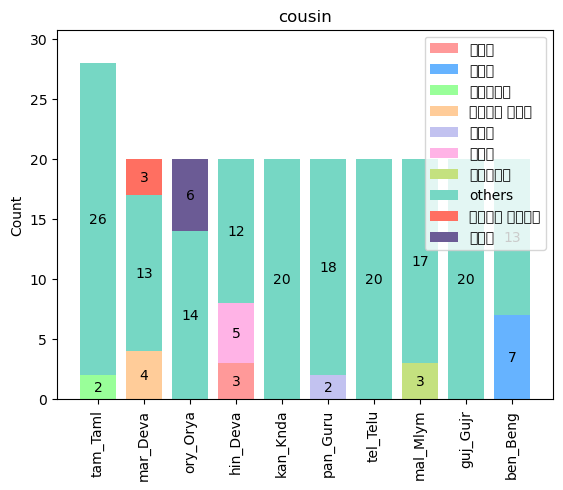

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

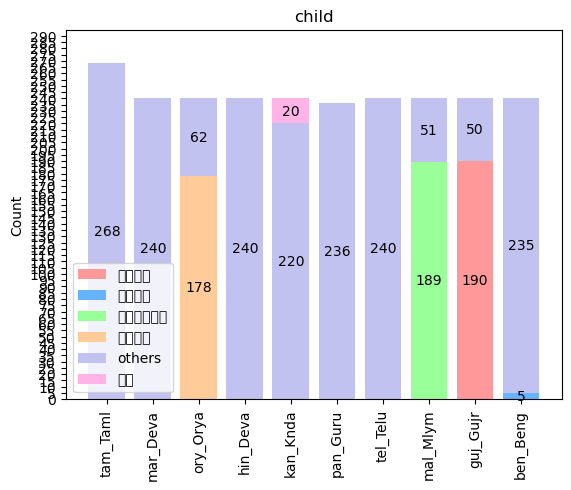

In [158]:
# Function to create stacked bar graph
def create_stacked_bar_graph(data, title):
    languages = list(data.keys())
    categories = set()
    
    # Collect all categories
    for lang in languages:
        categories.update(data[lang].keys())
    
    categories = list(categories)
    
    # Prepare data for plotting
    values = {category: [] for category in categories}
    
    for lang in languages:
        for category in categories:
            values[category].append(data[lang].get(category, 0))
    
    # Plotting
    fig, ax = plt.subplots()
    
    bottom = [0] * len(languages)
    # Define custom colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76d7c4','#ff6f61','#6b5b95']
    for i, category in enumerate(categories):
        bars = ax.bar(languages, values[category], label=category, bottom=bottom, color=colors[i % len(colors)])
        bottom = [i + j for i, j in zip(bottom, values[category])]
        
        # Adding labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 0),  # 0 points vertical offset
                            textcoords="offset points",
                            ha='center', va='center')
    
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.legend()
    # set x -ticks and y ticks
    ax.set_xticks(languages)
    ax.set_yticks(range(0, max(bottom) * 2, 5))
    ax.set_xticklabels(languages)
    ax.set_yticklabels(range(0, max(bottom) * 2, 5))
    
    # Adding gap at the top of the y-axis
    ax.set_ylim(0, max(bottom) * 1.1)
    
    plt.xticks(rotation=90)

     
    # Use the Noto Sans font
    # prop = fm.FontProperties(fname=noto_sans)
    # for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #     label.set_fontproperties(prop)

        

    
    plt.show()
    
    # # Use a font that supports the required characters
    # plt.rcParams['font.family'] = 'Noto Sans'
    
    # plt.show()


# Create stacked bar graphs for each level 1 word
for key in len_dict_resultant.keys():
    create_stacked_bar_graph(len_dict_resultant[key], key)

# Conclusion


if no dataset thn no reln_csv in translated